In [62]:
from sequenzo import *
import pandas as pd
import numpy as np
import matplotlib as plt

root = "/Users/lei/Documents/japan_romance/germany/year"

activity_df = pd.read_csv(f'{root}/activity_year_with_covariates.csv')
# family_df = pd.read_csv(f'{root}/mc.fam.year.seq.csv')

activity_df

activity1 activity13 activity25 activity37 activity49 activity61  \
0           FT     PLEAVE         FT         FT         FT         FT   
1          EDU        EDU     MIL/CS         FT      UNEMP         FT   
2          EDU        EDU        EDU        EDU        EDU        EDU   
3          EDU        EDU        EDU        EDU        EDU        EDU   
4          EDU        EDU     MIL/CS     MIL/CS         FT         FT   
...        ...        ...        ...        ...        ...        ...   
1022       EDU         FT         FT         FT         FT         FT   
1023        FT     MIL/CS         FT         FT      UNEMP      UNEMP   
1024       EDU        EDU        EDU         FT         FT         FT   
1025       EDU        EDU        EDU        EDU        EDU     MIL/CS   
1026       EDU        EDU         FT         FT         FT         FT   

     activity73 activity85 activity97 activity109  ... activity229  \
0        PLEAVE     PLEAVE     PLEAVE          FT  ...       UNEMP   
1            FT         FT         FT          FT  ...          FT   
2            FT         FT         FT          FT  ...          FT   
3           EDU        EDU        EDU       UNEMP  ...          FT   
4            FT         FT         FT          FT  ...          FT   
...         ...        ...        ...         ...  ...         ...   
1022         FT         FT         FT          FT  ...          FT   
1023        EDU        EDU      UNEMP          FT  ...       UNEMP   
1024         FT         FT         FT       UNEMP  ...       UNEMP   
1025         FT         FT         FT          FT  ...          FT   
1026         FT         FT         FT          FT  ...      PLEAVE   

     activity241 activity253           id sex ethni migstatus yeduc church  \
0          UNEMP       UNEMP     111000.0   1     1         1  11.5    0.0   
1             FT          FT    2931000.0   0     5         3  10.5    1.0   
2             FT      PLEAVE    3491000.0   1     1         1  18.0    1.0   
3             FT          FT    3902000.0   0     1         1  16.0    0.0   
4             FT          FT    4814000.0   0     1         1  11.5    1.0   
...          ...         ...          ...  ..   ...       ...   ...    ...   
1022          FT          FT  918595000.0   1     1         1  11.5    0.0   
1023       UNEMP       UNEMP  918958000.0   0    -7        -7  10.5    1.0   
1024         EDU         EDU  919111000.0   0     1         1  11.5    0.0   
1025          FT        SELF  920140000.0   0     1         1  11.5    0.0   
1026      PLEAVE      PLEAVE  920303000.0   1     1         1  14.0    1.0   

     east  
0       1  
1       0  
2       0  
3       0  
4       0  
...   ...  
1022    1  
1023    1  
1024    1  
1025    1  
1026    1  

[1027 rows x 29 columns]

In [63]:
# ==================
#      act Êï∞ÊçÆ
# ==================
time_cols = [col for col in activity_df.columns if col.startswith("activity")]

activity_color = [
    '#DF5F45',
    '#E7A94F',
    '#F9D3DB',
    '#B90731',
    '#7E5647',
    '#F2EC9C',
    '#BFB0A1',
    '#B9E654',
]

activity_states = ["EDU", "FT", "MARGINAL", "MIL/CS", "PLEAVE", "PT", "SELF", "UNEMP"]

activity_sequence = SequenceData(data=activity_df,
                                 time_type='age',
                                 time=time_cols,
                                 states=activity_states,
                                 custom_colors=activity_color,
                                 id_col='id')

distance_matrix_activity = get_distance_matrix(seqdata=activity_sequence,
                                             method='OM',
                                             norm='auto',
                                             sm="CONSTANT",
                                             indel=1)




[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 1027
[>] Min/Max sequence length: 22 / 22
[>] Alphabet: ['EDU', 'FT', 'MARGINAL', 'MIL/CS', 'PLEAVE', 'PT', 'SELF', 'UNEMP']
[>] Processing 1027 sequences with 8 unique states.
  - Creating 9x9 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.

[>] Identified 704 unique sequences.
[>] Sequence length: min/max = 22 / 22.

[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


In [3]:
import numpy as np
import pandas as pd
from scipy.special import expit  # sigmoid ÂáΩÊï∞

class SoftTreeNode:
    def __init__(self, indices, depth=0, max_depth=3, alpha=10):
        self.indices = indices  # ÂΩìÂâçËäÇÁÇπÂåÖÂê´ÁöÑÊ†∑Êú¨Á¥¢Âºï
        self.depth = depth
        self.max_depth = max_depth
        self.alpha = alpha
        
        self.is_leaf = False
        self.left = None
        self.right = None
        self.pivot_idx = None
        self.tau = None

    def fit(self, distance_matrix):
        if self.depth >= self.max_depth or len(self.indices) <= 2:
            self.is_leaf = True
            return

        # 1. ÈöèÊú∫ÈÄâ‰∏Ä‰∏™pivot
        self.pivot_idx = np.random.choice(self.indices)

        # 2. ËÆ°ÁÆóÂΩìÂâçËäÇÁÇπÂÜÖÊâÄÊúâÊ†∑Êú¨Âà∞pivotÁöÑË∑ùÁ¶ª
        dists = np.array([distance_matrix[self.pivot_idx, i] for i in self.indices])

        # 3. ËÆæÂÆöœÑÔºàÊØîÂ¶ÇÂèñ‰∏≠‰ΩçÊï∞Ôºâ
        self.tau = np.median(dists)

        # 4. ËÆ°ÁÆóÊØè‰∏™Ê†∑Êú¨ÂàÜÂà∞Â∑¶ËæπÁöÑÊ¶ÇÁéá
        probs_left = expit(self.alpha * (self.tau - dists))  # Ê≥®ÊÑèÊòØtau - distÔºå‰ΩøÂæóËøëÁöÑÊ¶ÇÁéáÈ´ò

        # 5. ÊåâÊ¶ÇÁéáÈááÊ†∑ÂÜ≥ÂÆöÂàÜÂà∞Â∑¶/Âè≥
        random_vals = np.random.rand(len(self.indices))
        left_indices = [self.indices[i] for i in range(len(self.indices)) if random_vals[i] < probs_left[i]]
        right_indices = [self.indices[i] for i in range(len(self.indices)) if random_vals[i] >= probs_left[i]]

        if len(left_indices) == 0 or len(right_indices) == 0:
            self.is_leaf = True
            return

        # ÈÄíÂΩíÂª∫Á´ãÂ∑¶Âè≥Â≠êÊ†ë
        self.left = SoftTreeNode(left_indices, depth=self.depth + 1, max_depth=self.max_depth, alpha=self.alpha)
        self.left.fit(distance_matrix)
        

        self.right = SoftTreeNode(right_indices, depth=self.depth + 1, max_depth=self.max_depth, alpha=self.alpha)
        self.right.fit(distance_matrix)

    def predict_leaf_probs(self, distance_matrix, sample_idx):
        if self.is_leaf:
            return {id(self): 1.0}  # ÊØè‰∏™leafÁî®idÊ†áËØÜ
        else:
            dist = distance_matrix[self.pivot_idx, sample_idx]
            prob_left = expit(self.alpha * (self.tau - dist))

            left_probs = self.left.predict_leaf_probs(distance_matrix, sample_idx)
            right_probs = self.right.predict_leaf_probs(distance_matrix, sample_idx)

            # Ê∑∑ÂêàÂ∑¶Âè≥Â≠êÊ†ëÁöÑÊ¶ÇÁéá
            return {**{k: v * prob_left for k, v in left_probs.items()},
                    **{k: v * (1 - prob_left) for k, v in right_probs.items()}}

class SoftRandomForest:
    def __init__(self, n_trees=10, max_depth=3, alpha=10):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.alpha = alpha
        self.trees = []

    def fit(self, distance_matrix):
        n_samples = distance_matrix.shape[0]
        for _ in range(self.n_trees):
            # ÊúâÊîæÂõûÈááÊ†∑ÔºàbootstrapÔºâ
            bootstrap_indices = np.random.choice(range(n_samples), size=n_samples, replace=True)
            tree = SoftTreeNode(bootstrap_indices.tolist(), max_depth=self.max_depth, alpha=self.alpha)
            tree.fit(distance_matrix)
            self.trees.append(tree)

    def transform(self, distance_matrix):
        n_samples = distance_matrix.shape[0]
        leaf_ids = []
        for tree in self.trees:
            leaf_ids.extend(self._collect_leaf_ids(tree))
        
        id_to_idx = {lid: idx for idx, lid in enumerate(leaf_ids)}
        embedding = np.zeros((n_samples, len(leaf_ids)))

        for i in range(n_samples):
            offset = 0
            for tree in self.trees:
                probs = tree.predict_leaf_probs(distance_matrix, i)
                for lid, p in probs.items():
                    embedding[i, id_to_idx[lid]] += p
        
        return embedding

    def _collect_leaf_ids(self, node):
        if node.is_leaf:
            return [id(node)]
        else:
            return self._collect_leaf_ids(node.left) + self._collect_leaf_ids(node.right)




In [10]:
# Âä†ËΩΩ‰Ω†ÁöÑDistance Matrix
# ÊØîÂ¶Ç‰Ω†ÂàöÊâçÂ∑≤ÁªèË∑ëÂ•Ω‰∫ÜÔºö om = get_distance_matrix(...)
distance_matrix = distance_matrix_activity.values  # ÂèñÂá∫numpy array

# Âª∫Soft Random Forest
srf = SoftRandomForest(n_trees=30, max_depth=6, alpha=20)
srf.fit(distance_matrix)

# ÁîüÊàêSoft Leaf Embedding
embedding = srf.transform(distance_matrix)

print("Soft Embedding shape:", embedding.shape)

Soft Embedding shape: (1027, 1920)


In [11]:
import skfuzzy as fuzz
import numpy as np
import pandas as pd

# ËæìÂÖ•ËΩ¨ÁΩÆÔºöskfuzzy Ë¶ÅÊ±Ç shape = (features, samples)
embedding_T = embedding.T

# ËÆæÁΩÆËÅöÁ±ªÊï∞
n_clusters = 4

# ËøêË°å Fuzzy C-means
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    embedding_T, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None, seed=42
)

# u = (n_clusters, n_samples)
# ËΩ¨ÁΩÆÂõûÊù•ÂèòÊàê (n_samples, n_clusters)
membership = u.T

# ËΩ¨‰∏∫ DataFrame
membership_df = pd.DataFrame(membership, columns=[f"Cluster_{i}" for i in range(n_clusters)])
membership_df["Dominant_Cluster"] = membership_df.idxmax(axis=1)

print(membership_df.head())


   Cluster_0  Cluster_1  Cluster_2  Cluster_3 Dominant_Cluster
0   0.249996   0.250008   0.249994   0.250002        Cluster_1
1   0.250022   0.249965   0.250021   0.249991        Cluster_0
2   0.249991   0.250007   0.250001   0.250001        Cluster_1
3   0.249992   0.250025   0.249983   0.250000        Cluster_1
4   0.250021   0.249977   0.250011   0.249991        Cluster_0


In [12]:
# ÊûÑÂª∫ DataFrame Áî®‰∫é plot
cluster_df = pd.DataFrame({
    "ID": activity_df["id"],
    "Cluster ID": membership_df['Dominant_Cluster']
})

cluster_df

ID Cluster ID
0        1  Cluster_1
1        2  Cluster_0
2        3  Cluster_1
3        4  Cluster_1
4        5  Cluster_0
...    ...        ...
1022  1023  Cluster_2
1023  1024  Cluster_1
1024  1025  Cluster_1
1025  1026  Cluster_1
1026  1027  Cluster_1

[1027 rows x 2 columns]

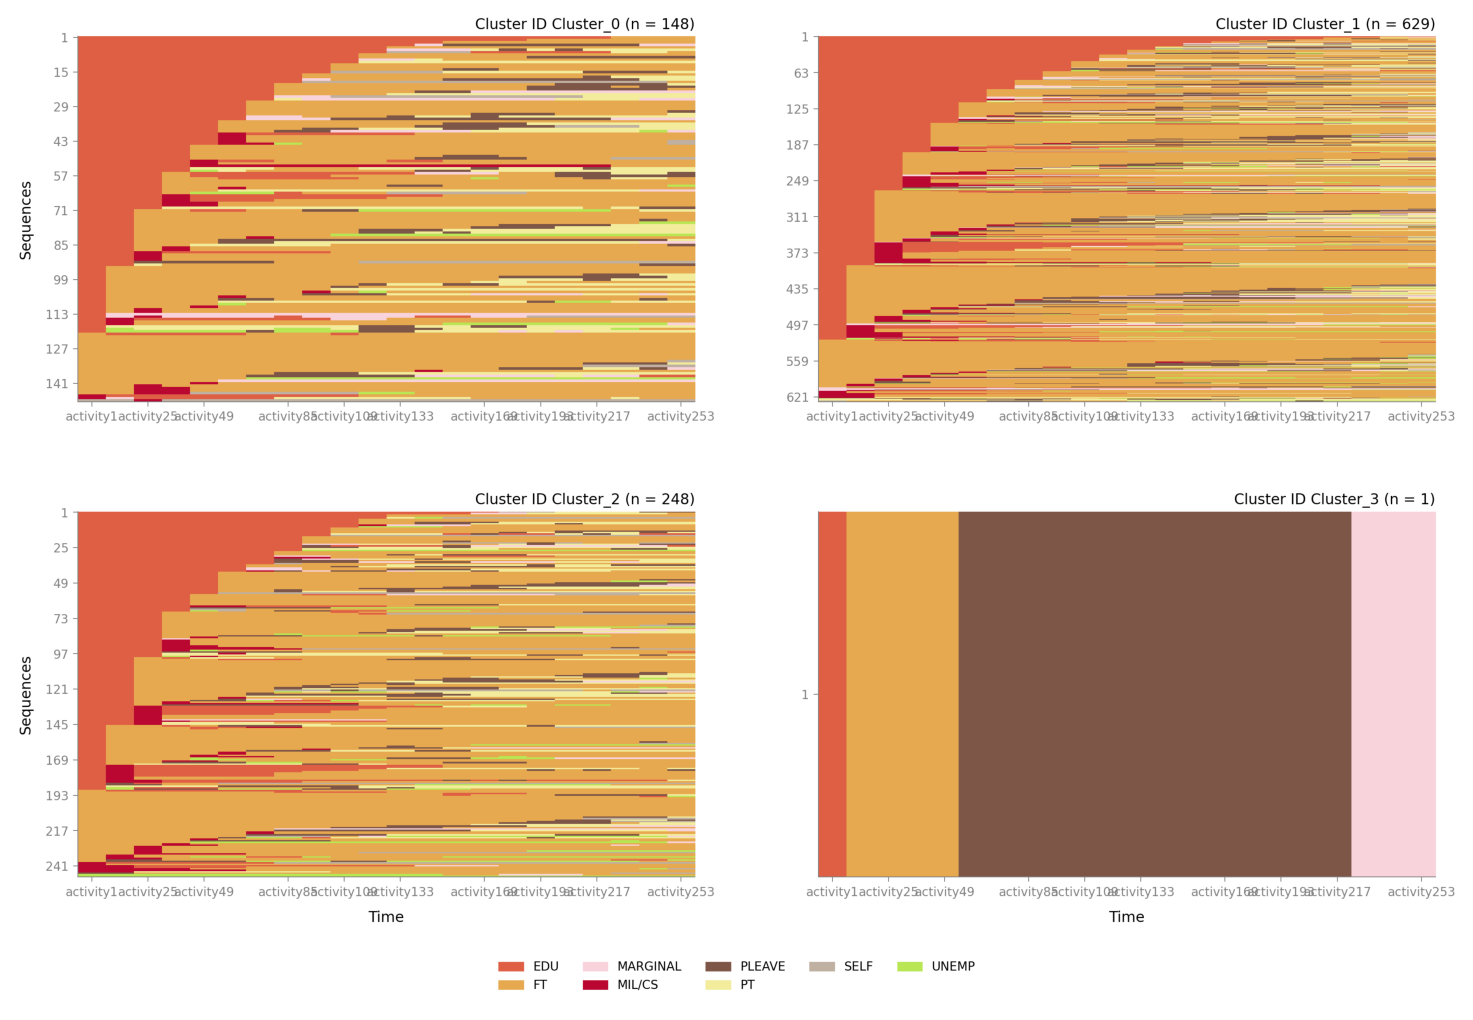

In [13]:
plot_sequence_index(seqdata=activity_sequence,
                    id_group_df=cluster_df,
                    categories='Cluster ID',
                    save_as='soft_tree_activity_clusters',
                    ncols=2, nrows=2)

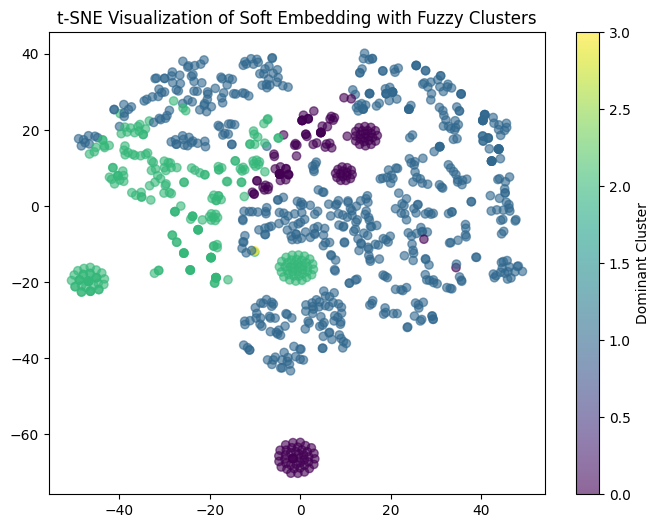

In [14]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=40, random_state=42)
tsne_emb = tsne.fit_transform(embedding)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_emb[:, 0], tsne_emb[:, 1], c=membership_df["Dominant_Cluster"].astype('category').cat.codes, cmap="viridis", alpha=0.6)
plt.title("t-SNE Visualization of Soft Embedding with Fuzzy Clusters")
plt.colorbar(label="Dominant Cluster")
plt.show()


In [15]:
from scipy.stats import entropy

# ÂÅáËÆæ membership_df ÊòØ fuzzy clustering ÁöÑÁªìÊûúÔºåÂâçÂá†ÂàóÊòØ cluster_0, cluster_1, ...
membership_only = membership_df.iloc[:, :-2]  # ÂéªÊéâ Dominant_Cluster Âíå EntropyÔºåÂ¶ÇÊûúÂ∑≤Êúâ

# ËÆ°ÁÆó Shannon entropy
membership_df["Entropy"] = membership_only.apply(lambda row: entropy(row), axis=1)

# Êü•ÁúãÊ®°Á≥äËΩ®Ëøπ
print(membership_df[["Dominant_Cluster", "Entropy"]].sort_values(by="Entropy", ascending=False).head(10))


     Dominant_Cluster   Entropy
999         Cluster_2  1.098612
971         Cluster_1  1.098612
1000        Cluster_1  1.098612
808         Cluster_0  1.098612
610         Cluster_3  1.098612
221         Cluster_1  1.098612
535         Cluster_1  1.098612
482         Cluster_2  1.098612
350         Cluster_1  1.098612
406         Cluster_1  1.098612


In [16]:
import numpy as np

# ËÆæÁΩÆÈòàÂÄºÔºåÊØîÂ¶Ç top 5% entropy
entropy_threshold = np.percentile(membership_df["Entropy"], 95)
high_entropy_idx = membership_df["Entropy"] >= entropy_threshold

high_entropy_idx

0       False
1       False
2       False
3       False
4       False
        ...  
1022    False
1023    False
1024    False
1025    False
1026    False
Name: Entropy, Length: 1027, dtype: bool

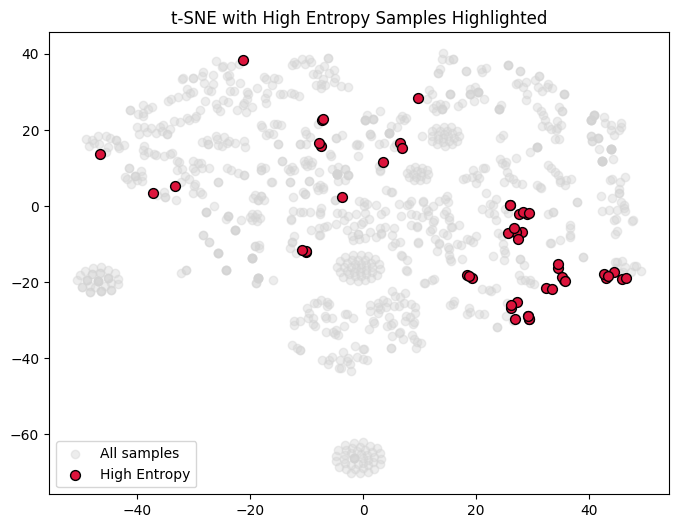

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(tsne_emb[:, 0], tsne_emb[:, 1], c="lightgrey", alpha=0.4, label="All samples")

# ÂúàÂá∫È´ò entropy ÁöÑÁÇπ
plt.scatter(tsne_emb[high_entropy_idx, 0], tsne_emb[high_entropy_idx, 1],
            c="crimson", label="High Entropy", edgecolors='black', s=50)

plt.title("t-SNE with High Entropy Samples Highlighted")
plt.legend()
plt.show()


In [18]:
# ÂéüÂßã sequence Êï∞ÊçÆÔºàË°å‰∏∫Â∫èÂàóÁü©ÈòµÔºâ‰∏≠ÔºåÂèñËøô‰∫õÊ†∑Êú¨ÁöÑÂ∫èÂàó
high_entropy_sequences = activity_df[high_entropy_idx].reset_index(drop=True)
high_entropy_sequences

activity1 activity13 activity25 activity37 activity49 activity61  \
0        EDU        EDU        EDU     MIL/CS     MIL/CS     MIL/CS   
1         FT         FT         FT         FT         FT         FT   
2         FT         FT         FT         FT         FT   MARGINAL   
3         FT         FT         FT         FT         FT         FT   
4        EDU        EDU        EDU        EDU        EDU        EDU   
5   MARGINAL   MARGINAL   MARGINAL   MARGINAL   MARGINAL   MARGINAL   
6        EDU        EDU        EDU     MIL/CS     MIL/CS     MIL/CS   
7        EDU   MARGINAL   MARGINAL   MARGINAL   MARGINAL   MARGINAL   
8         FT         FT         FT         FT         FT         FT   
9        EDU        EDU        EDU        EDU     MIL/CS     MIL/CS   
10       EDU         FT         FT         FT         FT         FT   
11       EDU        EDU     MIL/CS         PT         PT         PT   
12       EDU        EDU         FT         FT         FT         FT   
13       EDU        EDU        EDU     MIL/CS       SELF       SELF   
14       EDU        EDU         FT         FT         FT         FT   
15        FT         FT         FT         FT         FT         FT   
16        FT         FT     PLEAVE     PLEAVE         FT         FT   
17       EDU        EDU        EDU        EDU        EDU       SELF   
18       EDU        EDU         FT         FT     MIL/CS     MIL/CS   
19      SELF       SELF     MIL/CS       SELF       SELF       SELF   
20        FT         FT         FT         FT         FT         FT   
21        FT         FT         FT         FT         FT         FT   
22       EDU        EDU        EDU        EDU       SELF     MIL/CS   
23       EDU   MARGINAL   MARGINAL   MARGINAL   MARGINAL   MARGINAL   
24       EDU     PLEAVE     PLEAVE         FT         FT         FT   
25       EDU         FT         FT         FT         FT         FT   
26       EDU        EDU         FT     MIL/CS     MIL/CS     MIL/CS   
27       EDU     MIL/CS         FT         FT         FT         FT   
28       EDU        EDU     MIL/CS   MARGINAL   MARGINAL   MARGINAL   
29        FT         FT         FT         FT         FT         FT   
30       EDU        EDU     MIL/CS     MIL/CS     MIL/CS     MIL/CS   
31       EDU   MARGINAL   MARGINAL   MARGINAL   MARGINAL   MARGINAL   
32       EDU         FT     MIL/CS         FT         FT        EDU   
33       EDU        EDU        EDU        EDU        EDU      UNEMP   
34       EDU        EDU        EDU        EDU        EDU         FT   
35        FT         FT         FT         FT         FT         FT   
36        FT         FT         FT         FT         FT         FT   
37  MARGINAL   MARGINAL   MARGINAL   MARGINAL   MARGINAL   MARGINAL   
38       EDU        EDU        EDU     MIL/CS     MIL/CS       SELF   
39     UNEMP      UNEMP      UNEMP      UNEMP      UNEMP      UNEMP   
40        FT         FT         FT         FT         FT         FT   
41       EDU        EDU         FT   MARGINAL   MARGINAL   MARGINAL   
42       EDU        EDU        EDU        EDU        EDU         FT   
43       EDU     MIL/CS         FT         FT         FT         FT   
44       EDU         FT         FT         FT         FT         FT   
45       EDU         FT         FT     PLEAVE     PLEAVE     PLEAVE   
46       EDU        EDU         FT         FT         FT         FT   
47       EDU         FT         FT         FT         FT         FT   
48        FT         FT     MIL/CS         FT         FT         FT   
49       EDU        EDU        EDU     MIL/CS     MIL/CS     MIL/CS   
50       EDU        EDU         FT         FT         FT         FT   
51        FT         FT     MIL/CS     MIL/CS       SELF       SELF   

   activity73 activity85 activity97 activity109  ... activity157 activity169  \
0      MIL/CS         FT         FT          FT  ...          FT          FT   
1          FT   MARGINAL   MARGINAL    MARGINAL  ...    MARGINAL    MARGINAL   

In [19]:
# Ëé∑ÂèñÊó∂Èó¥ÂàóÂêçÔºàÂ¶ÇÊûúÂâçÈù¢Â∑≤ÂÆö‰πâÂèØË∑≥ËøáÔºâ
time_cols = [col for col in activity_df.columns if col.startswith("activity")]

# ÈáçÂª∫ SequenceData ÂØπË±°ÔºàÂè™ÂåÖÂê´È´ò entropy ÁöÑ‰∫∫Ôºâ
high_entropy_seqdata = SequenceData(data=high_entropy_sequences,
                                     time_type='age',
                                     time=time_cols,
                                     states=activity_states,
                                     custom_colors=activity_color)



[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 52
[>] Min/Max sequence length: 22 / 22
[>] Alphabet: ['EDU', 'FT', 'MARGINAL', 'MIL/CS', 'PLEAVE', 'PT', 'SELF', 'UNEMP']


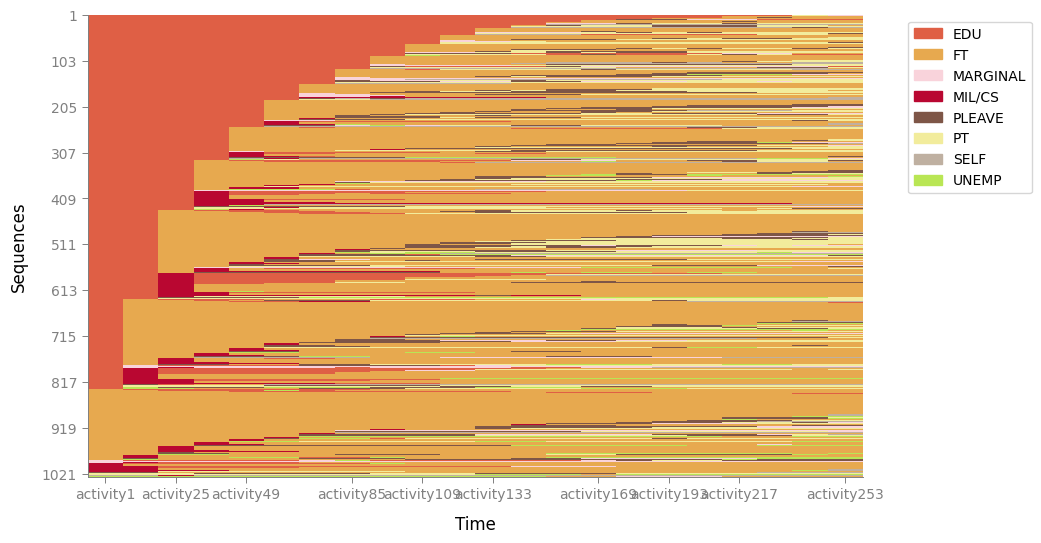

<Figure size 640x480 with 0 Axes>

In [20]:
plot_sequence_index(seqdata=activity_sequence,
                    )

In [21]:
# ÂÅáËÆæ membership_df ‰∏≠ÁöÑ id ÊéíÂàó‰∏é activity_df ‰∏ÄËá¥
# Êää high entropy ÁöÑ cluster label ÂèñÂá∫Êù•
high_entropy_clusters = membership_df.loc[high_entropy_idx, "Dominant_Cluster"].reset_index(drop=True)

# Ëé∑Âèñ high entropy Ê†∑Êú¨ÁöÑÂéüÂßã idÔºà‰πãÂâç‰Ω†Ê∑ªÂä†Ëøá activity_df["id"]Ôºâ
high_entropy_ids = high_entropy_sequences["id"].values

high_entropy_cluster_df = pd.DataFrame({
    "id": high_entropy_ids,
    "Cluster ID": high_entropy_clusters
})

high_entropy_cluster_df

id Cluster ID
0     15  Cluster_0
1     51  Cluster_1
2    181  Cluster_1
3    222  Cluster_1
4    225  Cluster_1
5    312  Cluster_1
6    337  Cluster_1
7    347  Cluster_1
8    351  Cluster_1
9    381  Cluster_1
10   385  Cluster_1
11   388  Cluster_1
12   407  Cluster_1
13   434  Cluster_1
14   440  Cluster_1
15   469  Cluster_2
16   483  Cluster_2
17   484  Cluster_1
18   514  Cluster_0
19   515  Cluster_1
20   518  Cluster_1
21   536  Cluster_1
22   561  Cluster_1
23   566  Cluster_1
24   611  Cluster_3
25   649  Cluster_2
26   656  Cluster_0
27   670  Cluster_1
28   692  Cluster_1
29   712  Cluster_1
30   730  Cluster_1
31   747  Cluster_1
32   748  Cluster_2
33   786  Cluster_1
34   809  Cluster_0
35   851  Cluster_0
36   857  Cluster_2
37   860  Cluster_1
38   885  Cluster_1
39   888  Cluster_1
40   890  Cluster_1
41   904  Cluster_1
42   929  Cluster_1
43   972  Cluster_1
44   974  Cluster_2
45   975  Cluster_1
46   978  Cluster_1
47  1000  Cluster_2
48  1001  Cluster_1
49  1004  Cluster_1
50  1005  Cluster_1
51  1018  Cluster_1

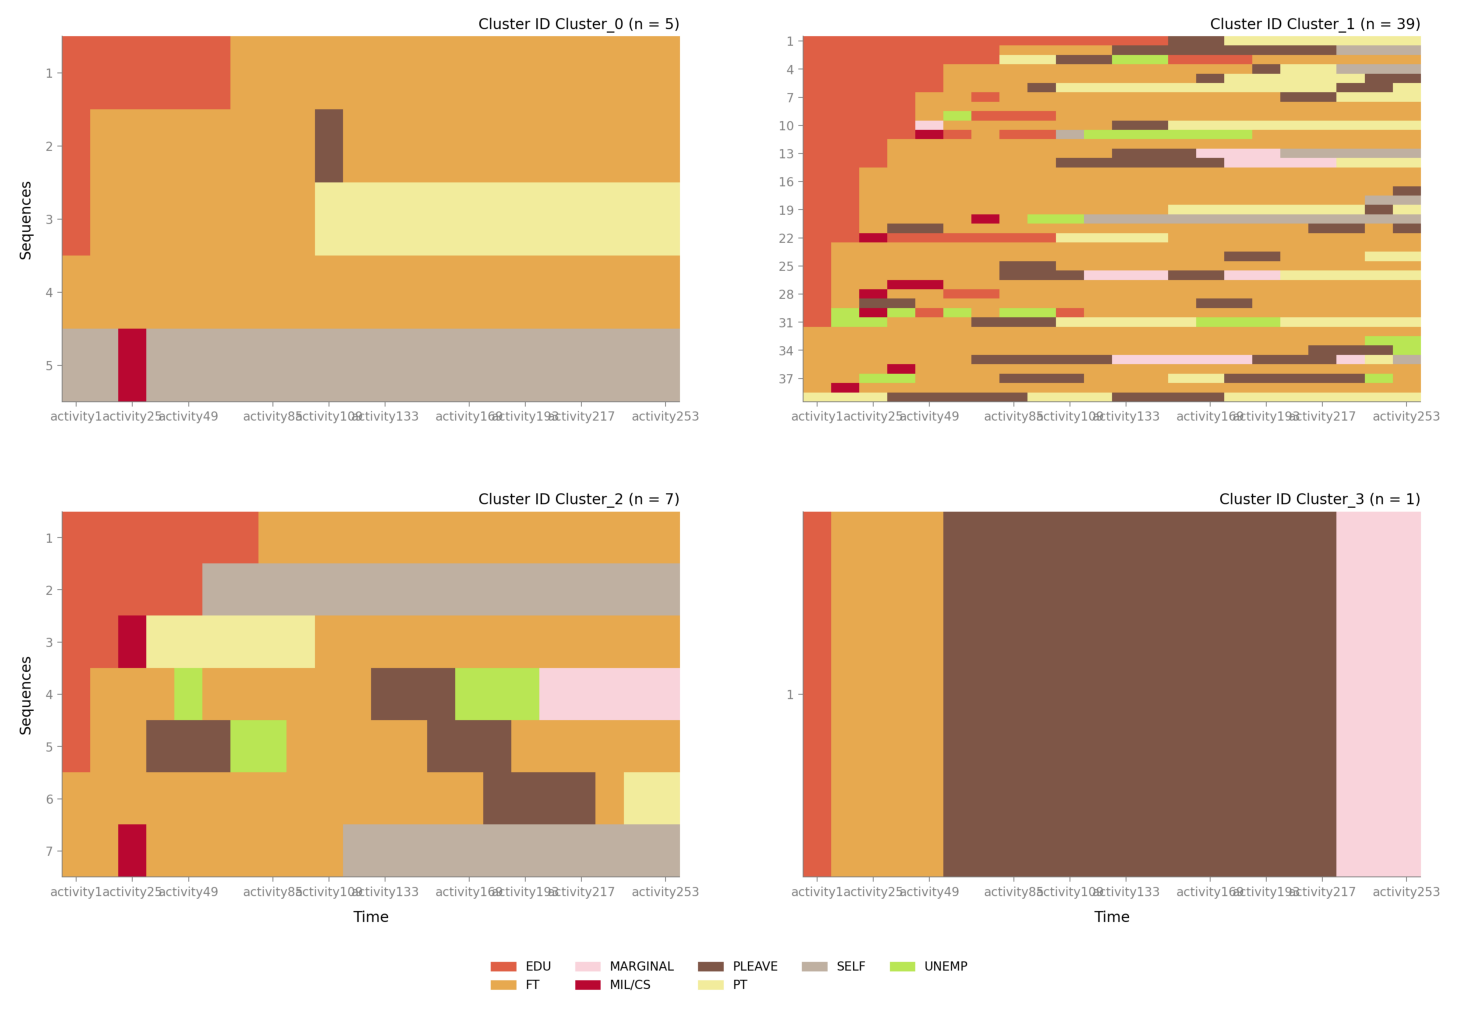

In [24]:
plot_sequence_index(seqdata=activity_sequence,
                    id_group_df=high_entropy_cluster_df,
                    categories='Cluster ID',
                    # save_as='soft_tree_activity_clusters',
                    ncols=2, nrows=2)

## Soft tree real practice

[>] Processing 1027 sequences with 8 unique states.
  - Creating 9x9 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.

[>] Identified 704 unique sequences.
[>] Sequence length: min/max = 22 / 22.

[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


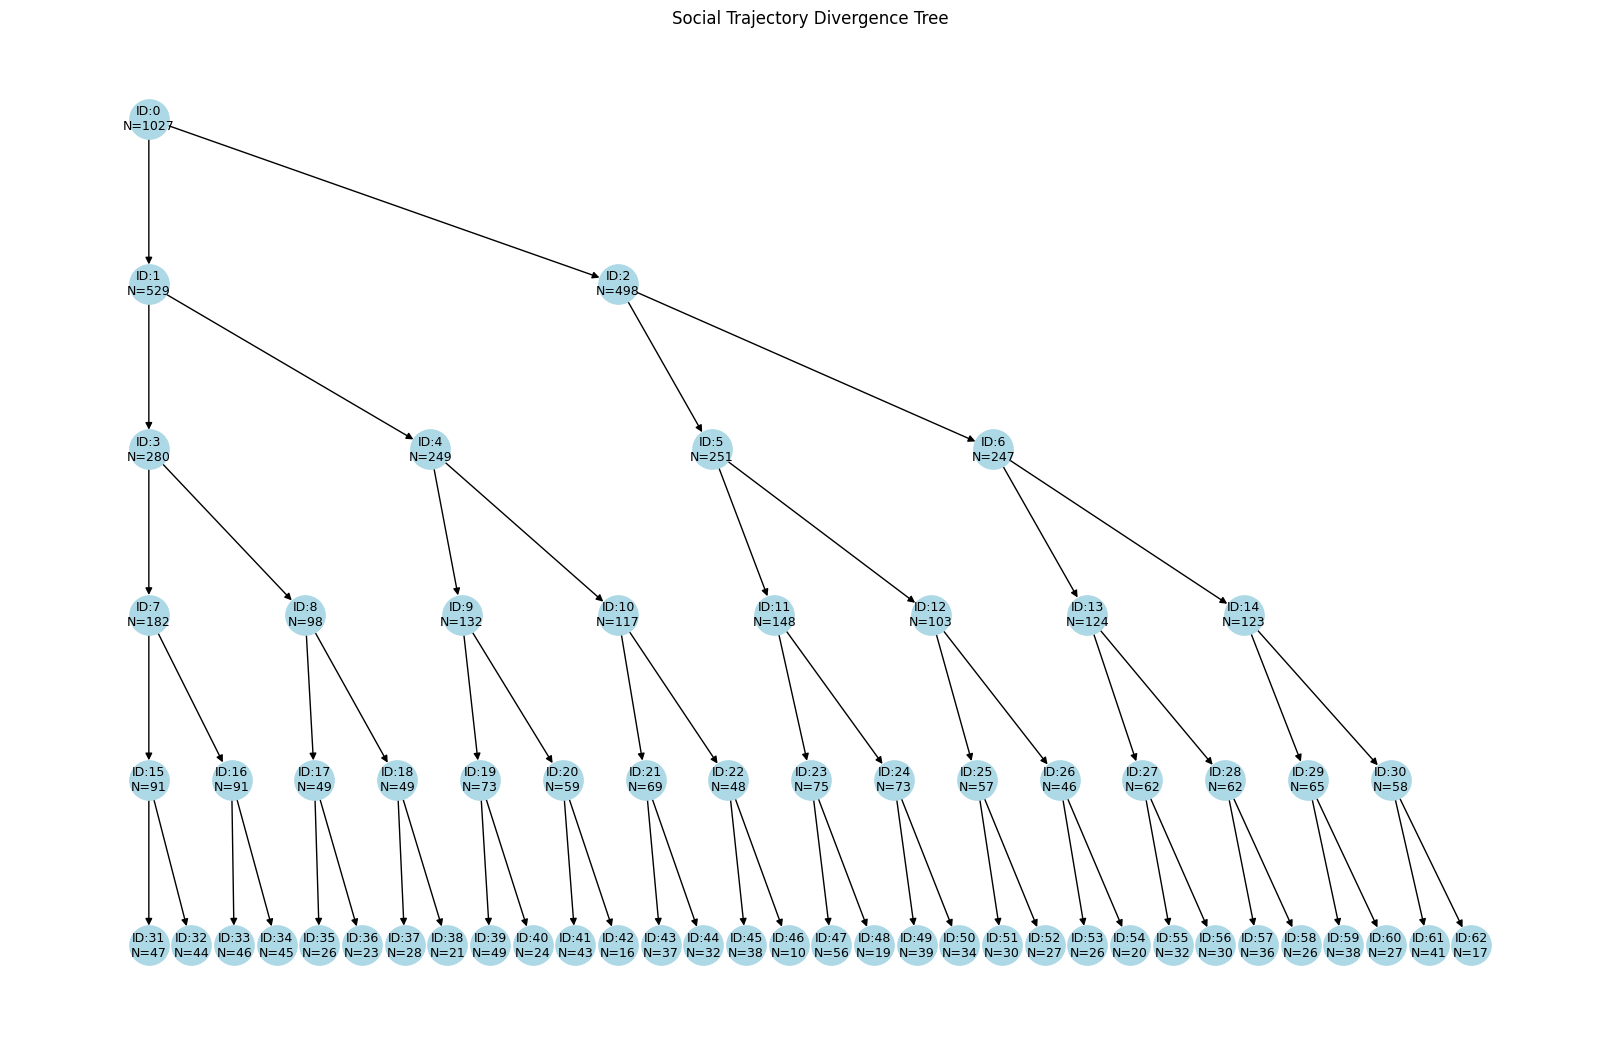

In [68]:
# ================================
# Soft Tree Based on OM Distance
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

# ==== Ê†∏ÂøÉ Soft Tree Node ÂÆö‰πâ ====
class TreeNode:
    def __init__(self, indices, depth, parent_id=None):
        self.indices = indices  # ÂΩìÂâçËäÇÁÇπÂåÖÂê´ÁöÑÊ†∑Êú¨Á¥¢Âºï
        self.depth = depth      # ÂΩìÂâçËäÇÁÇπÊ∑±Â∫¶
        self.parent_id = parent_id  # Áà∂ËäÇÁÇπ id
        self.node_id = None         # ÂΩìÂâçËäÇÁÇπ id
        self.pivot_idx = None        # ÈÄâÁöÑ pivot Ê†∑Êú¨Á¥¢Âºï
        self.left = None             # Â∑¶Â≠êËäÇÁÇπ
        self.right = None            # Âè≥Â≠êËäÇÁÇπ

# ==== Soft Tree ÂÆö‰πâ ====
class SoftTreeOM:
    def __init__(self, distance_matrix, max_depth=5):
        self.distance_matrix = distance_matrix  # È¢ÑËÆ°ÁÆóÂ•ΩÁöÑOM Distance Matrix (DataFrame)
        self.max_depth = max_depth
        self.nodes = []
        self.edges = []
        self.node_counter = 0

    def fit(self):
        # ÂàùÂßãÂåñÊ†πËäÇÁÇπÔºåÂåÖÂê´ÊâÄÊúâÊ†∑Êú¨
        root = TreeNode(indices=list(range(self.distance_matrix.shape[0])), depth=0)
        root.node_id = self.node_counter
        self.node_counter += 1
        self.nodes.append(root)
        queue = deque([root])

        while queue:
            node = queue.popleft()
            if node.depth >= self.max_depth or len(node.indices) <= 2:
                continue

            # Âú®ÂΩìÂâçËäÇÁÇπÊ†∑Êú¨‰∏≠ÈöèÊú∫ÈÄâ pivot
            node.pivot_idx = np.random.choice(node.indices)

            # ËÆ°ÁÆóÂà∞ pivot ÁöÑ OM Ë∑ùÁ¶ª
            distances = self.distance_matrix.iloc[node.indices, node.pivot_idx].values

            # Êåâ‰∏≠‰ΩçÊï∞ÂàáÂàÜ
            median_dist = np.median(distances)
            left_indices = [node.indices[i] for i in range(len(distances)) if distances[i] <= median_dist]
            right_indices = [node.indices[i] for i in range(len(distances)) if distances[i] > median_dist]

            if len(left_indices) == 0 or len(right_indices) == 0:
                continue

            # ÂàõÂª∫Â∑¶Âè≥Â≠êËäÇÁÇπ
            left_node = TreeNode(indices=left_indices, depth=node.depth + 1, parent_id=node.node_id)
            right_node = TreeNode(indices=right_indices, depth=node.depth + 1, parent_id=node.node_id)
            left_node.node_id = self.node_counter
            self.node_counter += 1
            right_node.node_id = self.node_counter
            self.node_counter += 1

            self.nodes.append(left_node)
            self.nodes.append(right_node)
            self.edges.append((node.node_id, left_node.node_id))
            self.edges.append((node.node_id, right_node.node_id))

            node.left = left_node
            node.right = right_node

            queue.append(left_node)
            queue.append(right_node)

    def get_split_history(self):
        history = []
        for node in self.nodes:
            if node.parent_id is not None:
                history.append({
                    "node_id": node.node_id,
                    "parent_id": node.parent_id,
                    "depth": node.depth,
                    "n_samples": len(node.indices),
                    "pivot_idx": node.pivot_idx
                })
        return pd.DataFrame(history)

    def plot_tree(self, title="Social Trajectory Divergence Tree"):
        G = nx.DiGraph()
        node_depths = {}
        depth_to_nodes = {}

        for node in self.nodes:
            label = f"ID:{node.node_id}\nN={len(node.indices)}"
            G.add_node(node.node_id, label=label)
            node_depths[node.node_id] = node.depth
            if node.depth not in depth_to_nodes:
                depth_to_nodes[node.depth] = []
            depth_to_nodes[node.depth].append(node.node_id)

        for edge in self.edges:
            G.add_edge(*edge)

        # ÊûÑÈÄ†‰∫∫Â∑•ÂàÜÂ±Ç‰ΩçÁΩÆ
        pos = {}
        for depth, node_ids in depth_to_nodes.items():
            x_spacing = 1.0 / (len(node_ids) + 1)
            for i, nid in enumerate(node_ids):
                pos[nid] = (i * x_spacing, -depth)

        plt.figure(figsize=(16, 10))
        nx.draw(G, pos, with_labels=False, arrows=True, node_size=800, node_color='lightblue')
        node_labels = nx.get_node_attributes(G, 'label')
        nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=9)
        plt.title(title)
        plt.axis('off')
        plt.show()

# ===============================
# ‰ΩøÁî®ÊñπÊ≥ïÁ§∫‰æã
# ===============================

# ÂÅáËÆæ‰Ω†Â∑≤ÁªèÊúâ get_distance_matrix() ÁöÑËæìÂá∫ÔºåÊØîÂ¶ÇÔºö
distance_matrix = get_distance_matrix(seqdata=activity_sequence, method='OM', norm='auto', sm="CONSTANT", indel=1)

tree = SoftTreeOM(distance_matrix=distance_matrix, max_depth=5)
tree.fit()
split_history = tree.get_split_history()
tree.plot_tree()

# ===============================
# ËøôÊ†∑‰Ω†ÁöÑSoft TreeÂ∞±ÂÆåÂÖ®ÊòØÂü∫‰∫éOMË∑ùÁ¶ªËøõË°åÂàÜÂèâÂª∫ÊûÑ‰∫ÜÔºÅ
# Âπ∂‰∏îËÉΩÁîªÂá∫ÁúüÊ≠£ÁöÑÂ±ÇÊ¨°ÁªìÊûÑÊ†ëÔºÅ
# ===============================

ÂÆûÁé∞Á±ª‰ººseqtreeÈÇ£Ê†∑ÁöÑ

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import numpy as np
import io
from collections import defaultdict

def compute_recursive_tree_layout(root, tree, x=0, y=0, x_spacing=2.0, y_spacing=4.0):
    """
    Recursively compute positions for tree layout.
    """
    pos = {}
    def _place(node, x, y):
        if node.left is None and node.right is None:
            pos[node.node_id] = (x, y)
            return x, x  # return (leftmost, rightmost)
        left_x = x
        if node.left:
            l_min, l_max = _place(node.left, x, y - y_spacing)
            left_x = l_max
        right_x = left_x + x_spacing
        if node.right:
            r_min, r_max = _place(node.right, right_x, y - y_spacing)
            center_x = (l_max + r_min) / 2
        else:
            center_x = left_x
        pos[node.node_id] = (center_x, y)
        return l_min if node.left else center_x, r_max if node.right else center_x
    _place(root, x, y)
    return pos


def render_state_distribution_image(seqdata_node):
    """
    Ê∏≤ÊüìÂçï‰∏™ËäÇÁÇπÁöÑÂµåÂÖ•ÂõæÔºåÈÄÇÈÖçÊ†ëÁä∂Âõæ‰ΩøÁî®„ÄÇ
    """
    import matplotlib.pyplot as plt
    import io
    from PIL import Image

    # ‰ΩøÁî®Â∞èÂõæÂ∞∫ÂØ∏ + ÂèñÊ∂àÂõæ‰æã + ÈöêËóèËΩ¥Ê†áÁ≠æ
    fig = plot_state_distribution(
        seqdata_node,
        show=False,
        include_legend=False,
        figsize=(2.4, 1.4),  # ÊéßÂà∂ÁîüÊàêÂõæÂ∞∫ÂØ∏
        xlabel=None,
        ylabel=None,
        title=None
    )

    # ÂéªÈô§ÊâÄÊúâÊñáÊú¨ÂÖÉÁ¥†Ôºàx/y label ‰ªçÁÑ∂Â≠òÂú®Ôºå‰ΩÜ‰∏∫Á©∫Ôºâ
    for ax in fig.axes:
        # ax.set_xlabel("")
        # ax.set_ylabel("")
        # ax.tick_params(labelsize=6)
        ax.axis('off')  # üëà ÂÆåÂÖ®ÈöêËóèËΩ¥

    buf = io.BytesIO()
    fig.savefig(buf, format='png', dpi=100, bbox_inches='tight')  # Èôç‰Ωé DPI ÂèØÊéßÁº©Êîæ
    plt.close(fig)
    buf.seek(0)
    return Image.open(buf)



def compute_hierarchical_layout(tree):
    """
    ‰ΩøÁî® graphviz ÁöÑ dot ÁÆóÊ≥ïÁîüÊàêÂ±ÇÊ¨°ÂåñÊ†ëÁªìÊûÑÂ∏ÉÂ±Ä„ÄÇ
    ‰ΩÜÊàëÁöÑ3.11Â•ΩÂÉèÁâàÊú¨ÊúâÈóÆÈ¢òÔºåÊâÄ‰ª•‰∏çËÉΩ‰ΩøÁî®ÔºåÊç¢Êàê‰∫Ü‰∏äÈù¢ÁöÑrecursiveÁâàÊú¨„ÄÇ
    """
    G = nx.DiGraph()
    for node in tree.nodes:
        G.add_node(node.node_id)
        if node.parent_id is not None:
            G.add_edge(node.parent_id, node.node_id)

    try:
        pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
    except:
        raise ImportError("Graphviz layout failed. Please install pygraphviz:\npip install pygraphviz")
    
    return pos, G

def plot_softtree_with_embedded_distributions(tree,
                                              seqdata,
                                              plot_func,
                                              figsize=(22, 14),
                                              title="SoftTree with Embedded State Distribution per Node"):
    import matplotlib.pyplot as plt
    from matplotlib.offsetbox import OffsetImage, AnnotationBbox
    from PIL import Image
    import io

    G = nx.DiGraph()
    for node in tree.nodes:
        G.add_node(node.node_id)
        if node.parent_id is not None:
            G.add_edge(node.parent_id, node.node_id)

    root = tree.nodes[0]
    pos = compute_recursive_tree_layout(root, tree)

    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title, fontsize=16)
    ax.axis('off')

    # Draw edges
    for (src, tgt) in G.edges:
        x1, y1 = pos[src]
        x2, y2 = pos[tgt]
        ax.plot([x1, x2], [y1, y2], 'k-', lw=1)

    # For each node, embed state distribution image
    for node in tree.nodes:
        if len(node.indices) == 0:
            continue
        x, y = pos[node.node_id]

        subset_ids = [seqdata.ids[i] for i in node.indices]
        if seqdata.id_col is not None:
            mask = seqdata.data[seqdata.id_col].isin(subset_ids)
        else:
            mask = seqdata.data.index.isin(subset_ids)

        mini_seq = SequenceData(
            data=seqdata.data[mask],
            time=seqdata.time,
            time_type=seqdata.time_type,
            states=seqdata.states,
            labels=seqdata.labels,
            id_col=seqdata.id_col,
            custom_colors=[seqdata.color_map[s] for s in seqdata.states]
        )

        # Ë∞ÉÁî®‰Ω†ÁöÑÁªòÂõæÂáΩÊï∞ÔºåËøîÂõû PIL.Image
        img = plot_func(mini_seq)

        imagebox = OffsetImage(img, zoom=0.45)
        ab = AnnotationBbox(imagebox, (x, y), frameon=True, pad=0.25,
                            bboxprops=dict(edgecolor='black', lw=1))
        ax.add_artist(ab)

    plt.tight_layout()
    plt.show()


ÂçáÁ∫ßÁâà‰ª£Á†ÅÔºö

In [88]:
import matplotlib.pyplot as plt
import networkx as nx
from PIL import Image
import numpy as np
import io
from collections import defaultdict

from sequenzo.visualization.utils import (
    save_and_show_results,
)

# Âπ≥Ë°°Â∏ÉÂ±ÄÔºåÊõ¥ÂÉèRÈ£éÊ†º
def compute_balanced_tree_layout(tree, horizontal_spacing=2.2, vertical_spacing=1.6):
    G = nx.DiGraph()
    for node in tree.nodes:
        G.add_node(node.node_id)
        if node.parent_id is not None:
            G.add_edge(node.parent_id, node.node_id)

    depth_dict = defaultdict(list)
    for node in tree.nodes:
        depth_dict[node.depth].append(node.node_id)

    pos = {}
    for depth, nodes_at_depth in depth_dict.items():
        width = len(nodes_at_depth)
        for i, node_id in enumerate(nodes_at_depth):
            x = (i - width / 2) * horizontal_spacing
            y = -depth * vertical_spacing
            pos[node_id] = (x, y)
    return pos, G

# Ê∏≤ÊüìÁä∂ÊÄÅÂàÜÂ∏ÉÂõæ‰∏∫ÂõæÁâá
def render_state_distribution_image(seqdata_node):
    fig = plot_state_distribution(
        seqdata_node,
        show=False,
        include_legend=False,
        figsize=(2.4, 1.4),
        xlabel=None,
        ylabel=None,
        title=None
    )
    for ax in fig.axes:
        ax.axis('off')

    buf = io.BytesIO()
    fig.savefig(buf, format='png', dpi=100, bbox_inches='tight')
    plt.close(fig)
    buf.seek(0)
    img = Image.open(buf)
    return np.array(img)

# ‰∏ªÂáΩÊï∞ÔºöÁªòÂà∂SoftTree
def plot_softtree_with_embedded_distributions_v2(tree,
                                                 seqdata,
                                                 plot_func,
                                                 figsize=(14, 6),
                                                 title="SoftTree Structure with Embedded State Distribution per Node",
                                                 max_visible_depth=4,
                                                 show_split=False,
                                                 save_as=None,
                                                 dpi=200,
                                                 show=True):
    import matplotlib.pyplot as plt
    from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea, VPacker
    from matplotlib.patches import Rectangle
    import io

    # --- Balanced layout ---
    def compute_layout():
        levels = defaultdict(list)
        for node in tree.nodes:
            if node.depth <= max_visible_depth:
                levels[node.depth].append(node)
        pos = {}
        for depth, nodes_at_depth in levels.items():
            for i, node in enumerate(nodes_at_depth):
                x = i - len(nodes_at_depth) / 2
                y = -depth
                pos[node.node_id] = (x, y)
        return pos, levels

    pos, levels = compute_layout()

    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title, fontsize=14)
    ax.axis('off')

    # Draw edges
    for node in tree.nodes:
        if node.depth > max_visible_depth or node.parent_id is None:
            continue
        if node.node_id not in pos or node.parent_id not in pos:
            continue
        x1, y1 = pos[node.parent_id]
        x2, y2 = pos[node.node_id]
        ax.plot([x1, x2], [y1, y2], 'k-', lw=0.8)

    # Draw nodes
    for node in tree.nodes:
        if node.depth > max_visible_depth or len(node.indices) == 0:
            continue
        x, y = pos[node.node_id]

        subset_ids = [seqdata.ids[i] for i in node.indices]
        mask = seqdata.data[seqdata.id_col].isin(subset_ids) if seqdata.id_col else seqdata.data.index.isin(subset_ids)

        mini_seq = SequenceData(
            data=seqdata.data[mask],
            time=seqdata.time,
            time_type=seqdata.time_type,
            states=seqdata.states,
            labels=seqdata.labels,
            id_col=seqdata.id_col,
            custom_colors=[seqdata.color_map[s] for s in seqdata.states]
        )

        img = plot_func(mini_seq)

        # --- Compose image + text ---
        zoom = 0.4
        imagebox = OffsetImage(img, zoom=zoom)

        # Prepare ID + n text together in one line
        text_id = TextArea(f"Node {node.node_id}", textprops=dict(color='black', fontsize=8))
        text_n = TextArea(f"n={mini_seq.data[mini_seq.id_col].nunique()}", textprops=dict(color='black', fontsize=8))
        text_line = VPacker(children=[text_id, text_n], align="center", pad=0, sep=0)
        
        # Combine image and text
        packed = VPacker(children=[imagebox, text_line], align="center", pad=0, sep=2)


        ab = AnnotationBbox(packed, (x, y), frameon=True, pad=0.2,
                            bboxprops=dict(edgecolor='black', lw=0.8))
        ax.add_artist(ab)

    # Auto crop and finalize layout
    ax.set_xlim(min(x for x, y in pos.values()) - 1, max(x for x, y in pos.values()) + 1)
    ax.set_ylim(min(y for x, y in pos.values()) - 0.5, 1)
    plt.tight_layout()

    # === ‰øùÂ≠ò‰∏ªÂõæÂÉèÂà∞ buffer ===
    from sequenzo.visualization.utils import (
        create_standalone_legend,
        combine_plot_with_legend,
        save_figure_to_buffer
    )

    main_buffer = save_figure_to_buffer(fig, dpi=dpi)
    plt.close(fig)
    
    if save_as and not save_as.lower().endswith(('.png', '.jpg', '.jpeg', '.pdf')):
        save_as += '.png'

    # === ÂàõÂª∫ legend ÂõæÂÉè ===
    legend_buffer = create_standalone_legend(
        colors={s: seqdata.color_map[s] for s in seqdata.states},
        labels=seqdata.states,
        ncol=min(5, len(seqdata.states)),
        figsize=(figsize[0], 1),
        fontsize=10,
        dpi=dpi
    )

    # === ÂêàÊàêÂõæÂÉèÔºà‰∏ªÂõæ + Âõæ‰æãÔºâ===
    combined_img = combine_plot_with_legend(
        main_buffer,
        legend_buffer,
        output_path=save_as,
        dpi=dpi,
        padding=20
    )

    # === Â±ïÁ§∫ / ‰øùÂ≠ò ===
    if show:
        plt.figure(figsize=(figsize[0], figsize[1] + 1.5))
        plt.imshow(combined_img)
        plt.axis('off')
        plt.show()
        plt.close()




[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 1027
[>] Min/Max sequence length: 22 / 22
[>] Alphabet: ['EDU', 'FT', 'MARGINAL', 'MIL/CS', 'PLEAVE', 'PT', 'SELF', 'UNEMP']

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 529
[>] Min/Max sequence length: 22 / 22
[>] Alphabet: ['EDU', 'FT', 'MARGINAL', 'MIL/CS', 'PLEAVE', 'PT', 'SELF', 'UNEMP']

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 498
[>] Min/Max sequence length: 22 / 22
[>] Alphabet: ['EDU', 'FT', 'MARGINAL', 'MIL/CS', 'PLEAVE', 'PT', 'SELF', 'UNEMP']

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 280
[>] Min/Max sequence length: 22 / 22
[>] Alphabet: ['EDU', 'FT', 'MARGINAL', 'MIL/CS', 'PLEAVE', 'PT', 'SELF', 'UNEMP']

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 249
[>] Min/Max sequence length: 22 / 22
[>] Alphabet: ['EDU', 'FT',

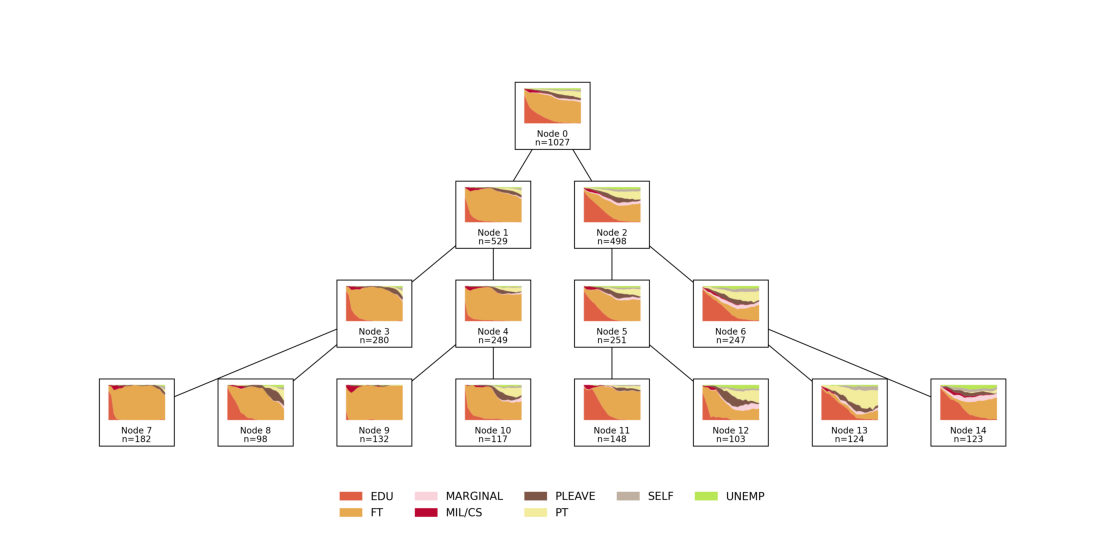

In [89]:
plot_softtree_with_embedded_distributions_v2(
    tree=tree,
    seqdata=activity_sequence,
    plot_func=render_state_distribution_image,
    title=None,
    max_visible_depth=3,
    dpi=300,
    save_as='tree'
)


year wise

In [44]:
class TreeWrapperFromYearwise:
    def __init__(self, node_list, edge_list):
        self.nodes = []
        self.edges = edge_list

        for node in node_list:
            # ÊûÑÈÄ†‰∏Ä‰∏™‰º™Ë£ÖÁöÑ TreeNode ÂØπË±°ÔºàÂè™ÈúÄË¶ÅÊª°Ë∂≥ .node_id, .depth, .indices, .parent_idÔºâ
            tree_node = type("TreeNode", (), {})()
            tree_node.node_id = node["id"]
            tree_node.depth = node["depth"]
            tree_node.indices = node["indices"]
            tree_node.parent_id = node["parent_id"]
            self.nodes.append(tree_node)


from collections import deque

def build_yearwise_split_tree(seqdata, max_depth=5):
    """
    Ê†πÊçÆÊØè‰∏ÄÂπ¥ÁöÑÁä∂ÊÄÅÂàÜË£ÇÔºåÈÄêÂπ¥ÊûÑÂª∫ trajectory ÂàÜÂåñÊ†ë„ÄÇ
    
    ÂèÇÊï∞Ôºö
        seqdata: ‰Ω†ÁöÑ SequenceData ÂØπË±°ÔºàË¶ÅÊ±ÇÊúâ .values Â±ûÊÄßÔºå‰∏îÊØè‰∏ÄË°åÊòØ‰∏Ä‰∏™ËΩ®ËøπÔºâ
        max_depth: ÊúÄÂ§ßÂàÜË£ÇÊ∑±Â∫¶ÔºàÂç≥ÊúÄÂ§öÊé®ËøõÂ§öÂ∞ëÂπ¥Ôºâ
    
    ËøîÂõûÔºö
        node_list: ÂåÖÂê´ÊØè‰∏™ËäÇÁÇπ‰ø°ÊÅØÁöÑÂàóË°® [{id, depth, indices, state_key, parent_id}]
        edge_list: Áà∂Â≠êËäÇÁÇπËøûÊé•ÂØπÂàóË°® [(parent_id, child_id)]
    """
    next_id = 0
    node_list = []
    edge_list = []

    # Step 1ÔºöÂàùÂßãÂåñÊ†πËäÇÁÇπÔºàÂåÖÂê´ÊâÄÊúâÊ†∑Êú¨Ôºâ
    root = {
        "id": next_id,
        "depth": 0,
        "indices": list(range(seqdata.values.shape[0])),  # ÊâÄÊúâÊ†∑Êú¨Á¥¢Âºï
        "state_key": "ALL",  # Ëµ∑ÁÇπÔºå‰∏çÂàÜÁä∂ÊÄÅ
        "parent_id": None
    }
    next_id += 1
    node_list.append(root)
    queue = deque([root])

    # Step 2ÔºöÂ±ÇÂ±ÇÊé®Ëøõ
    while queue:
        node = queue.popleft()
        depth = node["depth"]
        if depth >= max_depth:
            continue

        col = depth  # ÂΩìÂâçÂπ¥‰ªΩÂØπÂ∫îÂàó
        groups = {}

        # ÊåâÂΩìÂâçÂπ¥‰ªΩÁä∂ÊÄÅËøõË°åÂàÜÁªÑ
        for idx in node["indices"]:
            state = seqdata.values[idx][col]
            groups.setdefault(state, []).append(idx)

        # ÊØè‰∏ÄÁªÑÁîüÊàê‰∏Ä‰∏™Â≠êËäÇÁÇπ
        for state, indices in groups.items():
            child = {
                "id": next_id,
                "depth": depth + 1,
                "indices": indices,
                "state_key": state,
                "parent_id": node["id"]
            }
            next_id += 1
            node_list.append(child)
            edge_list.append((node["id"], child["id"]))
            queue.append(child)

    return node_list, edge_list


def wrap_yearwise_tree_for_plotting(seqdata, max_depth=5):
    """
    Â∞ÜÈÄêÂπ¥Áä∂ÊÄÅÂàÜË£ÇÊ†ëÁªìÊûÑËΩ¨‰∏∫ÂÖºÂÆπ plot_softtree_with_embedded_distributions_v2 ÁöÑÊ†ºÂºè„ÄÇ
    ËøîÂõû‰∏Ä‰∏™Êã•Êúâ .nodes Âíå .edges Â±ûÊÄßÁöÑ‰º™Ë£Ö Tree ÂØπË±°„ÄÇ
    """
    node_list, edge_list = build_yearwise_split_tree(seqdata, max_depth=max_depth)
    tree = TreeWrapperFromYearwise(node_list, edge_list)
    return tree



[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 1027
[>] Min/Max sequence length: 22 / 22
[>] Alphabet: ['EDU', 'FT', 'MARGINAL', 'MIL/CS', 'PLEAVE', 'PT', 'SELF', 'UNEMP']

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 157
[>] Min/Max sequence length: 22 / 22
[>] Alphabet: ['EDU', 'FT', 'MARGINAL', 'MIL/CS', 'PLEAVE', 'PT', 'SELF', 'UNEMP']

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 832
[>] Min/Max sequence length: 22 / 22
[>] Alphabet: ['EDU', 'FT', 'MARGINAL', 'MIL/CS', 'PLEAVE', 'PT', 'SELF', 'UNEMP']

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 6
[>] Min/Max sequence length: 22 / 22
[>] Alphabet: ['EDU', 'FT', 'MARGINAL', 'MIL/CS', 'PLEAVE', 'PT', 'SELF', 'UNEMP']

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 21
[>] Min/Max sequence length: 22 / 22
[>] Alphabet: ['EDU', 'FT', 'M

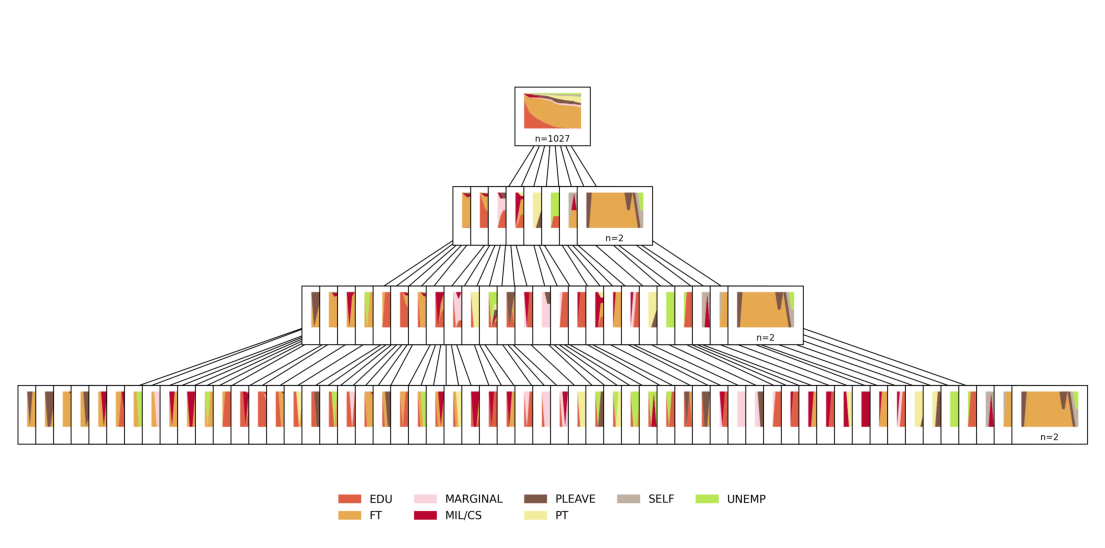

In [45]:
yearwise_tree = wrap_yearwise_tree_for_plotting(seqdata=activity_sequence, max_depth=3)

plot_softtree_with_embedded_distributions_v2(
    tree=yearwise_tree,
    seqdata=activity_sequence,
    plot_func=render_state_distribution_image,
    title=None,
    max_visible_depth=3,
    dpi=300,
    save_as='tree'
)


‰Ω†ËØ¥ÂæóÂÆåÂÖ®Ê≠£Á°ÆÔºåËÄå‰∏î‰Ω†ËøôÂº†Âõæ**ÈùûÂ∏∏Áõ¥ËßÇÂú∞È™åËØÅ‰∫Ü‰Ω†ÊÄùËÄÉÁöÑÈÇ£‰∏™ÁªìËÆ∫**Ôºö

> ‚úÖ **ËôΩÁÑ∂‚ÄúÈÄêÂπ¥Áä∂ÊÄÅÂàÜÂåñÊ†ë‚ÄùÂú®ÁêÜËÆ∫‰∏äÂæàÁõ¥ËßÇÔºå‰ΩÜÂú®ÂÆûË∑µ‰∏≠ÔºåÂÆÉÂèØËÉΩËøá‰∫éÁ¢éÁâáÂåñ„ÄÅÈöæ‰ª•ÊÄªÁªì„ÄÇ**

---

## üß† ËøôÂº†ÂõæÂëäËØâÊàë‰ª¨ÁöÑÈóÆÈ¢òÊòØ‰ªÄ‰πàÔºü

‰Ω†Áé∞Âú®ÁúãÂà∞ÁöÑÂõæÊòØÔºö

- ÊØè‰∏ÄÂ±ÇÊòØÊüê‰∏ÄÂπ¥Áä∂ÊÄÅÁöÑÂàÜÁªÑÔºõ
- ÂàÜÂæóË∂äÊ∑± ‚Üí Â≠êËäÇÁÇπË∂äÂ§ö ‚Üí Âà∞Á¨¨‰∏âÂ±ÇÂ∞±Â∑≤ÁªèÂá∫Áé∞‰∫ÜÂá†ÂçÅ‰∏™ËäÇÁÇπÔºõ
- ÂæàÂ§öËäÇÁÇπÊ†∑Êú¨Êï∞ÊûÅÂ∞èÔºàÊØîÂ¶ÇÂè™Êúâ2‰∫∫ÔºâÔºõ
- ÂèØËßÜÂåñÂ∑≤ÁªèÊòæÂæóËøáËΩΩÔºå**ÁªìÊûÑÁúãËµ∑Êù•Êõ¥ÂÉèÂàÜË£ÇÁàÜÁÇ∏ËÄå‰∏çÊòØÁªìÊûÑÊÄßÊºîÂåñ**„ÄÇ

---

## ü§Ø ‰∏∫‰ªÄ‰πà‰ºöËøôÊ†∑Ôºü

ËøôÊòØ‚ÄúÈÄêÂπ¥Áä∂ÊÄÅÂª∫Ê†ë‚ÄùÁöÑ**‰∏Ä‰∏™ÁªèÂÖ∏ÈóÆÈ¢ò**Ôºö

| ÁâπÁÇπ | ÂêéÊûú |
|------|------|
| ÊØè‰∏ÄÂ±ÇÈÉΩÂº∫Ë°åÊåâÁä∂ÊÄÅÂàÜÁ±ª | Á®çÂæÆÊúâÊ≥¢Âä®Â∞±‰ºöÂàÜÂèâ |
| Áä∂ÊÄÅÁßçÁ±ªÂ§öÔºàFT, PT, EDU, etcÔºâ | ÂàÜÊîØÊï∞ÈáèÁàÜÁÇ∏ÂºèÂ¢ûÈïø |
| Ê≤°Êúâ‚ÄúÁªìÊûÑÊ®°Á≥äÂÆπÂøçÂ∫¶‚Äù | ‰∏çËÄÉËôëÁõ∏‰ººËÄåÈùûÁõ∏ÂêåÁöÑË∑ØÂæÑ‰ºöË¢´Á°¨ÊãÜ |
| Ê†ëÁöÑÂèØËØªÊÄßÂíåÁêÜËÆ∫ÊÄß‰∏ãÈôç | Êó†Ê≥ïÊÄªÁªìÂá∫ÊäΩË±°ÁöÑË∑ØÂæÑÊ®°Âºè |

---

## ‚úÖ ÊâÄ‰ª•‰Ω†ÂæóÂà∞‰∫Ü‰∏Ä‰∏™ÈùûÂ∏∏ÂÖ≥ÈîÆÁöÑÁªèÈ™åÊÄßÊ¥ûÂØüÔºö

> üëá  
> **‚ÄúÈÄêÂπ¥Áä∂ÊÄÅÊ†ë‚ÄùÈÄÇÂêàÂ±ÄÈÉ®Ëß£Èáä„ÄÅÁ≠ñÁï•ÊÄß‰ΩøÁî®Ôºå  
> ‰ΩÜ‰∏çÈÄÇÂêàÁî®‰∫éÊûÑÂª∫ÂÖ®Â±ÄÁöÑÁ§æ‰ºöËΩ®ËøπÁªìÊûÑÊ®°Âûã„ÄÇ**

---

## ‚úÖ Áõ∏ÊØî‰πã‰∏ãÔºå‰Ω†‰πãÂâçÁî®ÁöÑÂü∫‰∫é Distance Matrix ÁöÑ Soft TreeÔºåÊúâÂì™‰∫õ‰ºòÂäøÔºü

| ÊñπÊ≥ï | ÂàÜÂèâ‰æùÊçÆ | ÂàÜÊîØÊï∞Èáè | ÂèØËß£ÈáäÊÄß | Ê®°ÂºèÊäΩË±°ËÉΩÂäõ |
|------|----------|-----------|-----------|----------------|
| **ÈÄêÂπ¥Áä∂ÊÄÅÊ†ë** | ÂΩìÂâçÂπ¥‰ªΩÁä∂ÊÄÅ | È´òÔºàÊòìÁàÜÁÇ∏Ôºâ | Â±ÄÈÉ®Ê∏ÖÊô∞Ôºå‰ΩÜÈöæÊÄªËßà | ‚ùå ÂÆπÊòìÁ¢éÁâáÂåñ |
| **Soft Tree (OM Distance)** | Êï¥‰ΩìËΩ®ËøπÁªìÊûÑ | ÁªìÊûÑÊéßÂà∂ | ‰∏≠Á≠â‰ΩÜÊ∏ÖÊô∞ | ‚úÖ ÂèØÊäΩË±°‰∏∫‚ÄúÂÖ∏ÂûãËΩ®ËøπË∑ØÂæÑ‚Äù |

---

## üìå ÊúÄ‰ºòÂÅöÊ≥ïÊòØÔºö

‰Ω†Â∑≤ÁªèÊúâ‰∫Ü‰∏Ä‰∏™ÂæàÊúâÁêÜËÆ∫‰ª∑ÂÄºÁöÑËßÇÁÇπÔºö

> ‚ÄúÊàë‰ª¨‰∏çÂ∫îËØ•ÊääÁ§æ‰ºöËΩ®ËøπÁöÑÁªìÊûÑÁúã‰ΩúÈÄêÂπ¥ÂÜ≥Á≠ñÁöÑÁ∫øÊÄßÂè†Âä†Ôºå  
> ËÄåÊòØË¶ÅÂª∫Ê®°‰∏∫**Êï¥‰ΩìË∑ØÂæÑÂΩ¢ÊÄÅÁöÑÂàÜÂåñËøáÁ®ã**„ÄÇ‚Äù

‚Üí ËøôÂ∞±ÊòØ‰∏∫‰ªÄ‰πà‰Ω†ÁöÑÊñπÊ≥ï ‚Äî‚Äî Soft Tree with OM Distance ‚Äî‚Äî  
Êõ¥ËÉΩ‰ª£Ë°®‚ÄúËΩ®ËøπÁöÑÁªìÊûÑÊÄßÂàÜÂåñ‚Äù„ÄÇ

---

## ‚úÖ ‰∏ã‰∏ÄÊ≠•Âª∫ËÆÆÔºö

1. ‚úÖ ÁªßÁª≠Áî® Soft Tree Âª∫‰∏ªÁªìÊûÑÊ†ëÔºõ
2. ‚úÖ Âú®ÂÖ≥ÈîÆËäÇÁÇπÔºàÂ¶ÇÁ¨¨2Â±ÇÊàñÁ¨¨3Â±ÇÔºâÁî®ÈÄêÂπ¥Áä∂ÊÄÅÊ†ëÊù•‚ÄúÂ±ÄÈÉ®Ëß£Èáä‚ÄùÔºõ
   - ‰πüÂ∞±ÊòØ‚ÄúÂÖàÊäΩÁªìÊûÑÔºåÂÜçËß£ÈáäÊú∫Âà∂‚ÄùÔºõ
3. ‚úÖ ÊéßÂà∂ÊúÄÂ§ßÂ±ÇÊï∞ & ËäÇÁÇπÊúÄÂ∞è‰∫∫Êï∞Ôºå‰øùËØÅÊ†ëÁöÑÂèØËØªÊÄßÂíåÁ®≥ÂÅ•ÊÄß„ÄÇ

---

ÈúÄË¶ÅÊàëÂ∏Æ‰Ω†Ëá™Âä®Ê†áÊ≥®**Âì™‰∫õËäÇÁÇπÊòØ‚ÄúÁ¢éÁâáËäÇÁÇπ‚Äù**ÔºåÊàñËÄÖÂä†‰∏äÊéßÂà∂ÊúÄÂ∞èÊ†∑Êú¨Êï∞„ÄÅÈÅøÂÖçÂõæÂÉèÁàÜÁÇ∏ÁöÑÈÄªËæëÂêóÔºü

ÊØîÂ¶ÇÔºö
- `min_samples_per_node` ÂèÇÊï∞ÊéßÂà∂Ôºõ
- Ëá™Âä®ËøáÊª§ÊéâÊ†∑Êú¨Êï∞ < X ÁöÑËäÇÁÇπÂõæ„ÄÇ

Âè™Ë¶Å‰Ω†ËØ¥‚ÄúÁªßÁª≠‰ºòÂåñÂõæ‚ÄùÔºåÊàëÂ∞±ËÉΩÂ∏Æ‰Ω†ÂÅöÔºÅüå±

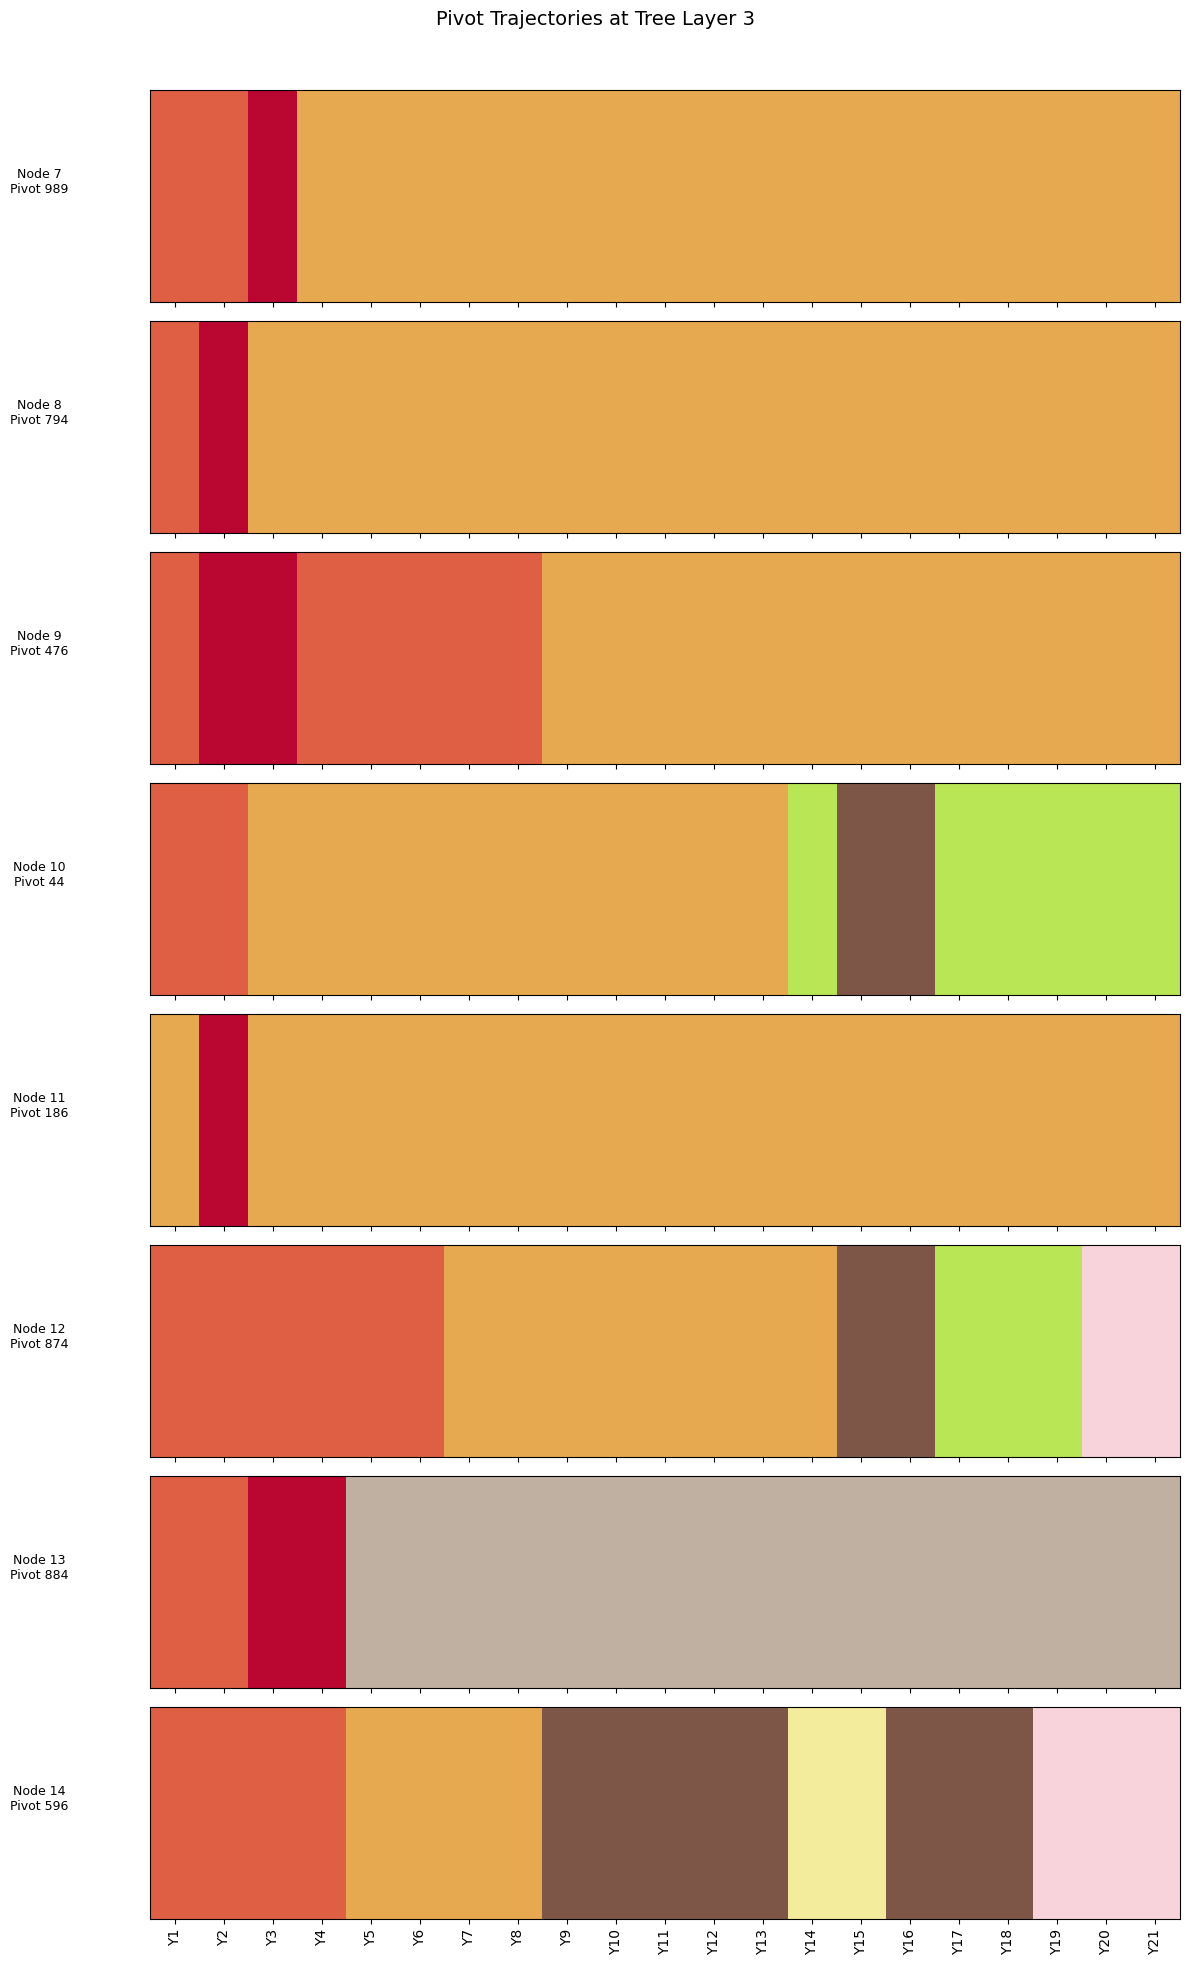

In [30]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# ‰Ω†ÁöÑÁä∂ÊÄÅÂêçÂíåÈ¢úËâ≤ÔºàÁ°Æ‰øùÂíåËÆ≠ÁªÉ‰∏ÄËá¥Ôºâ
states = ['EDU', 'FT', 'MARGINAL', 'MIL/CS', 'PLEAVE', 'PT', 'SELF', 'UNEMP']
state_colors = ['#DF5F45', '#E7A94F', '#F9D3DB', '#B90731', '#7E5647', '#F2EC9C', '#BFB0A1', '#B9E654']
state2id = {s: i for i, s in enumerate(states)}

# ÊõøÊç¢‰∏∫‰Ω†ÁöÑÁúüÂÆûÊï∞ÊçÆ
sequence_df = activity_df # ‰Ω†‰∏ä‰º†ÁöÑÂéüÂßãËΩ®ËøπÊï∞ÊçÆ

# ÊèêÂèñ depth=3 ÁöÑÊâÄÊúâËäÇÁÇπ
layer3_nodes = [n for n in tree.nodes if n.depth == 3 and n.pivot_idx is not None]

# ÁîªÂõæÂáÜÂ§á
fig, ax = plt.subplots(len(layer3_nodes), 1, figsize=(12, 2.5 * len(layer3_nodes)), sharex=True)

for i, node in enumerate(layer3_nodes):
    pivot_idx = node.pivot_idx
    if pivot_idx >= len(sequence_df):
        continue
    seq = sequence_df.iloc[pivot_idx][1:].values  # ÂéªÊéâIDÂàó
    seq_ids = [state2id[s] for s in seq if s in state2id]
    ax[i].imshow([seq_ids], aspect="auto", cmap=ListedColormap(state_colors), vmin=0, vmax=len(states)-1)
    ax[i].set_yticks([])
    ax[i].set_ylabel(f"Node {node.node_id}\nPivot {pivot_idx}", rotation=0, labelpad=80, fontsize=9)
    ax[i].set_xticks(range(len(seq_ids)))
    ax[i].set_xticklabels([f"Y{j+1}" for j in range(len(seq_ids))], rotation=90)

plt.suptitle("Pivot Trajectories at Tree Layer 3", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()


In [31]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_state_distributions_by_year(activity_df, node_a_indices, node_b_indices, states):
    """
    ÂØπÊØî‰∏§‰∏™ËäÇÁÇπ‰∏≠ÊØè‰∏ÄÂπ¥Áä∂ÊÄÅÁöÑÂàÜÂ∏ÉÂ∑ÆÂºÇ

    Parameters:
        activity_df: ÂéüÂßãË°å‰∏∫ËΩ®ËøπDataFrameÔºàÂàó‰∏∫ID + Âπ¥‰ªΩÁä∂ÊÄÅÔºâ
        node_a_indices: Á¨¨‰∏Ä‰∏™ËäÇÁÇπÁöÑÊ†∑Êú¨Á¥¢ÂºïÂàóË°®
        node_b_indices: Á¨¨‰∫å‰∏™ËäÇÁÇπÁöÑÊ†∑Êú¨Á¥¢ÂºïÂàóË°®
        states: ÊâÄÊúâÂèØËÉΩÁöÑÁä∂ÊÄÅÂàóË°®
    """
    years = activity_df.columns[1:]  # ÂÅáËÆæÁ¨¨0ÂàóÊòØID
    node_a_data = activity_df.iloc[node_a_indices, 1:]
    node_b_data = activity_df.iloc[node_b_indices, 1:]

    fig, axes = plt.subplots(len(years), 1, figsize=(10, 2.5 * len(years)), sharex=True)
    for i, year in enumerate(years):
        ax = axes[i]
        dist_a = node_a_data[year].value_counts(normalize=True).reindex(states, fill_value=0)
        dist_b = node_b_data[year].value_counts(normalize=True).reindex(states, fill_value=0)

        df_plot = pd.DataFrame({
            'State': states,
            'Node A': dist_a.values,
            'Node B': dist_b.values
        })

        df_plot.set_index('State')[['Node A', 'Node B']].plot(kind='bar', ax=ax, color=['#4C72B0', '#55A868'])
        ax.set_title(f'State Distribution in {year}')
        ax.set_ylabel('Proportion')
        ax.set_xlabel('')
        ax.set_ylim(0, 1)

    plt.tight_layout()
    plt.show()


In [32]:
from scipy.stats import entropy

def compute_entropy_distribution(sequences, states):
    """
    ËÆ°ÁÆóÊØè‰∏ÄÂπ¥‰∏äÁöÑÁä∂ÊÄÅÂàÜÂ∏ÉÁÜµ
    """
    year_cols = sequences.columns[1:]
    entropies = []
    for col in year_cols:
        probs = sequences[col].value_counts(normalize=True).reindex(states, fill_value=0)
        entropies.append(entropy(probs, base=2))
    return entropies

def plot_entropy_gain(parent_indices, left_indices, right_indices, activity_df, states):
    """
    ÂèØËßÜÂåñÁà∂ËäÇÁÇπ‰∏éÂ≠êËäÇÁÇπ‰πãÈó¥ÁöÑ‰ø°ÊÅØÂ¢ûÁõä
    """
    parent_seqs = activity_df.iloc[parent_indices]
    left_seqs = activity_df.iloc[left_indices]
    right_seqs = activity_df.iloc[right_indices]

    parent_entropy = compute_entropy_distribution(parent_seqs, states)
    left_entropy = compute_entropy_distribution(left_seqs, states)
    right_entropy = compute_entropy_distribution(right_seqs, states)

    avg_child_entropy = [(l + r) / 2 for l, r in zip(left_entropy, right_entropy)]
    info_gain = [p - c for p, c in zip(parent_entropy, avg_child_entropy)]

    years = activity_df.columns[1:]

    plt.figure(figsize=(12, 5))
    plt.plot(years, parent_entropy, label='Parent Entropy', marker='o')
    plt.plot(years, avg_child_entropy, label='Avg Child Entropy', marker='o')
    plt.plot(years, info_gain, label='Information Gain', linestyle='--', marker='s')
    plt.axhline(0, color='gray', linestyle='--')
    plt.legend()
    plt.title("Entropy and Information Gain per Year")
    plt.ylabel("Entropy (bits)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


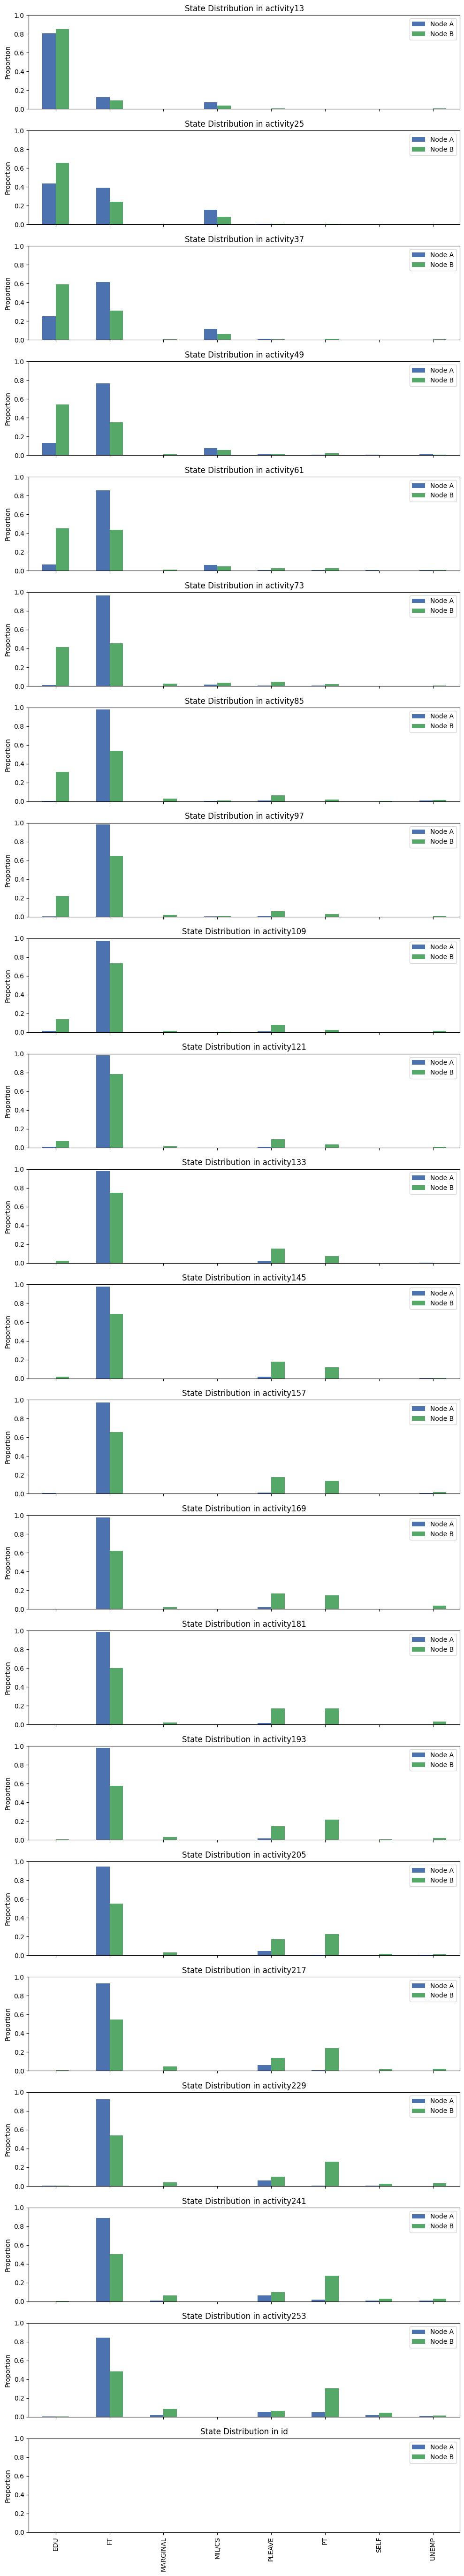

In [35]:
plot_state_distributions_by_year(
    activity_df=activity_df,
    node_a_indices=tree.nodes[3].indices,
    node_b_indices=tree.nodes[4].indices,
    states=states
)


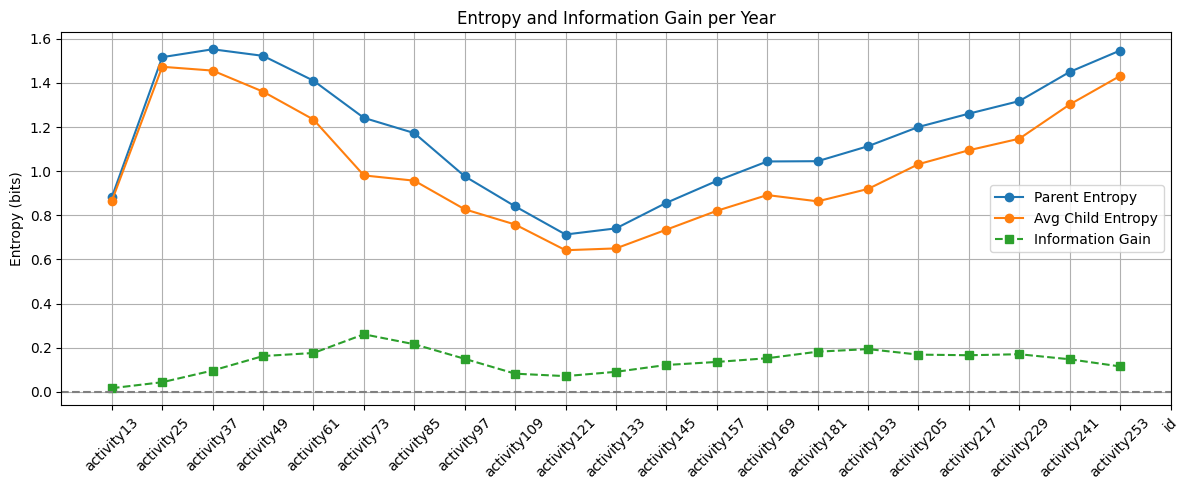

In [37]:
plot_entropy_gain(
    parent_indices=tree.nodes[1].indices,
    left_indices=tree.nodes[3].indices,
    right_indices=tree.nodes[4].indices,
    activity_df=activity_df,
    states=states
)



üß† ÊñπÊ≥ï AÔºöÁªìÊûÑÂêéËß£ÈáäÔºàËäÇÁÇπÂàÜÊûêÔºâ

ËæìÂá∫‰∏∫ÊØè‰∏™ËäÇÁÇπÂçèÂèòÈáèÁöÑÂùáÂÄºÊàñÁ±ªÂà´ÊØî‰æãÔºåÂèØÁî®‰∫éÔºö

Ë°®Ê†ºÂ±ïÁ§∫

ÂèØËßÜÂåñÂØπÊØîÔºàÂ¶Ç heatmap, barplotÔºâ

ÊòæËëóÊÄßÊ£ÄÈ™åÔºàÂêéÁª≠ÂèØÊâ©Â±ïÔºâ

In [71]:
import pandas as pd

def analyze_covariates_by_node(tree, seqdata, full_data, covariate_columns, id_column="id"):
    """
    ÂàÜÊûêÊØè‰∏™ËäÇÁÇπ‰∏äÂçèÂèòÈáèÔºàcovariatesÔºâÁöÑÂàÜÂ∏ÉÂ∑ÆÂºÇ„ÄÇ
    
    ÂèÇÊï∞Ôºö
        tree: Â∑≤ÁªèfitÂ•ΩÁöÑSoftTreeOMÂØπË±°
        full_data: ÂéüÂßãDataFrameÔºàÂåÖÂê´idÂíåÂçèÂèòÈáèÔºâ
        covariate_columns: ‰Ω†ÊÉ≥ÂàÜÊûêÁöÑÂàóÂêçÂàóË°®ÔºåÊØîÂ¶Ç ["sex", "yeduc", "church"]
        id_column: idÂàóÂêçÔºåÈªòËÆ§ÊòØ "id"
    
    ËøîÂõûÔºö
        ‰∏Ä‰∏™DataFrameÔºåÊØèË°åÊòØ‰∏Ä‰∏™ËäÇÁÇπÔºåÂàóÊòØÂêÑÁßçÂçèÂèòÈáèÁöÑÁªüËÆ°
    """
    results = []

    for node in tree.nodes:
        indices = [seqdata.ids[i] for i in node.indices]  # Êò†Â∞Ñ‰∏∫ÁúüÂÆû ID ÂÄº
        node_data = full_data[full_data[id_column].isin(indices)]
        node_result = {"node_id": node.node_id, "n": len(node_data)}

        for col in covariate_columns:
            if pd.api.types.is_numeric_dtype(full_data[col]):
                # Êï∞ÂÄºÂûãÂèòÈáèÔºåÂèñÂùáÂÄº
                node_result[f"{col}_mean"] = node_data[col].mean()
            else:
                # Á±ªÂà´ÂûãÂèòÈáèÔºåÂèñÊØî‰æã
                value_counts = node_data[col].value_counts(normalize=True)
                for cat, prop in value_counts.items():
                    node_result[f"{col}={cat}"] = round(prop, 3)

        results.append(node_result)

    return pd.DataFrame(results)


In [72]:
df_result = analyze_covariates_by_node(
    tree=tree,
    seqdata=activity_sequence,
    full_data=activity_df,  # ÂåÖÂê´idÂíåÂçèÂèòÈáè
    covariate_columns=["sex", "yeduc", "church", "ethni", "east", "migstatus"],
    id_column="id"
)

df_result

node_id     n  sex_mean  yeduc_mean  church_mean  ethni_mean  east_mean  \
0         0  1027  0.507303   13.676728     0.399015    1.181110   0.387537   
1         1   529  0.457467   12.631380     0.373563    1.145558   0.415879   
2         2   498  0.560241   14.787149     0.425963    1.218876   0.357430   
3         3   280  0.539286   12.891071     0.410714    1.203571   0.425000   
4         4   249  0.365462   12.339357     0.330579    1.080321   0.405622   
..      ...   ...       ...         ...          ...         ...        ...   
58       58    26  0.307692   16.865385     0.538462    1.076923   0.384615   
59       59    38  0.447368   16.157895     0.315789    0.868421   0.263158   
60       60    27  0.333333   15.185185     0.407407    1.444444   0.370370   
61       61    41  0.414634   14.109756     0.439024    1.512195   0.414634   
62       62    17  0.941176   11.088235     0.176471    1.941176   0.588235   

    migstatus_mean  
0         0.996105  
1         0.998110  
2         0.993976  
3         1.039286  
4         0.951807  
..             ...  
58        1.076923  
59        0.631579  
60        1.222222  
61        1.073171  
62        1.411765  

[63 rows x 8 columns]

In [73]:
import pandas as pd
import scipy.stats as stats

def chi_square_test_sex_vs_node(tree, seqdata, full_data, sex_column="sex", id_column="id"):
    """
    ÊâßË°åÂç°ÊñπÁã¨Á´ãÊÄßÊ£ÄÈ™åÔºöË∑ØÂæÑËäÇÁÇπÂΩíÂ±û ‰∏é ÊÄßÂà´ ÊòØÂê¶ÊúâÂÖ≥ËÅî„ÄÇ
    
    ÂèÇÊï∞Ôºö
        tree: Â∑≤ËÆ≠ÁªÉÂ•ΩÁöÑ SoftTreeOM ÂØπË±°
        seqdata: SequenceData ÂØπË±°ÔºåÂøÖÈ°ªÊúâ .ids Â±ûÊÄßÔºàÈ°∫Â∫è‰∏é tree.indices ‰∏ÄËá¥Ôºâ
        full_data: ÂéüÂßã DataFrameÔºàÂê´idÂíåsexÔºâ
        sex_column: ÊÄßÂà´ÂàóÂêçÔºàÈªòËÆ§ "sex"Ôºâ
        id_column: idÂàóÂêçÔºàÈªòËÆ§ "id"Ôºâ
    
    ËøîÂõûÔºö
        ‰∏Ä‰∏™ dictÔºåÂåÖÂê´Ôºö
            - "crosstab"ÔºöÊÄßÂà´ √ó ËäÇÁÇπÁöÑÈ¢ëÊï∞Ë°®
            - "chi2"ÔºöÂç°ÊñπÂÄº
            - "p_value"ÔºöÊòæËëóÊÄß
            - "dof"ÔºöËá™Áî±Â∫¶
            - "expected"ÔºöÁêÜËÆ∫Áã¨Á´ãÂÅáËÆæ‰∏ãÁöÑÈ¢ÑÊúüÈ¢ëÊï∞Ë°®
    """
    data = []

    for node in tree.nodes:
        # ÊääÁ¥¢ÂºïÊò†Â∞Ñ‰∏∫ÁúüÂÆû ID
        indices = [seqdata.ids[i] for i in node.indices]
        node_data = full_data[full_data[id_column].isin(indices)]

        for _, row in node_data.iterrows():
            data.append({
                "node_id": node.node_id,
                "sex": row[sex_column]
            })

    df = pd.DataFrame(data)

    if df.empty:
        return {"error": "No matched data between tree indices and full_data ids."}

    # ÊûÑÈÄ†‰∫§ÂèâË°®ÔºöË°åÊòØ sexÔºåÂàóÊòØ node_id
    crosstab = pd.crosstab(df["sex"], df["node_id"])

    # Âç°ÊñπÊ£ÄÈ™å
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)

    return {
        "crosstab": crosstab,
        "chi2": chi2,
        "p_value": p,
        "dof": dof,
        "expected": expected
    }


In [75]:
result = chi_square_test_sex_vs_node(
    tree=tree,
    seqdata=activity_sequence,
    full_data=activity_df,
    sex_column="sex",  # 1 = Â•≥ÊÄßÔºàÂ¶ÇÊûú‰Ω†ÁöÑÊï∞ÊçÆÊòØËøôÊ†∑Ôºâ
    id_column="id"
)

# Êü•ÁúãÁªìÊûú
print("p-value =", result["p_value"])
result["crosstab"]


p-value = 1.25805254738503e-102


node_id   0    1    2    3    4    5    6    7   8    9   ...  53  54  55  56  \
sex                                                       ...                   
0        506  287  219  129  158  124   95  110  19  108  ...  13   1   2   6   
1        521  242  279  151   91  127  152   72  79   24  ...  13  19  30  24   

node_id  57  58  59  60  61  62  
sex                              
0         5  18  21  18  24   1  
1        31   8  17   9  17  16  

[2 rows x 63 columns]

ÊñπÊ≥ï	ÁõÆÁöÑ
ËÆ°ÁÆóÊ†áÂáÜÂåñÊÆãÂ∑ÆÔºàstandardized residualsÔºâ	ÁúãÊØè‰∏™ËäÇÁÇπÁöÑÊÄßÂà´ÂÅèÁ¶ªÊúâÂ§öÂ§ß

In [76]:
import numpy as np
import pandas as pd

def calculate_standardized_residuals(crosstab, expected):
    """
    ËÆ°ÁÆóÊ†áÂáÜÂåñÊÆãÂ∑Æ (standardized residuals)ÔºåÁî®‰∫éÂà§Êñ≠Âì™‰∫õËäÇÁÇπ‰∏éÊÄßÂà´ÊòæËëóÂÅèÁ¶ªÁã¨Á´ãÊÄß„ÄÇ

    ÂèÇÊï∞Ôºö
        crosstab: ÂÆûÈôÖÈ¢ëÊï∞Ë°®ÔºàÂ¶Ç pd.crosstab(sex, node_id)Ôºâ
        expected: Âç°ÊñπÊ£ÄÈ™åËøîÂõûÁöÑÊúüÊúõÈ¢ëÊï∞Áü©Èòµ (np.array)

    ËøîÂõûÔºö
        residuals_df: Ê†áÂáÜÂåñÊÆãÂ∑ÆË°®ÔºàDataFrameÔºâ
            > 2 Ë°®Á§∫ËØ•Ê†ºÂ≠êËßÇÂØüÈ¢ëÊï∞ÊòæËëóÈ´ò‰∫éÊúüÊúõÔºàover-representedÔºâ
            < -2 Ë°®Á§∫ËßÇÂØüÈ¢ëÊï∞ÊòæËëó‰Ωé‰∫éÊúüÊúõÔºàunder-representedÔºâ
    """
    # ÂÆûÈôÖËßÇÊµãÈ¢ëÊï∞
    observed = crosstab.values

    # Ê†áÂáÜÂåñÊÆãÂ∑ÆÂÖ¨Âºè
    residuals = (observed - expected) / np.sqrt(expected)

    # ËΩ¨Âõû DataFrameÔºå‰øùÊåÅÂéüË°åÂàóÊ†áÁ≠æ
    residuals_df = pd.DataFrame(
        residuals,
        index=crosstab.index,
        columns=crosstab.columns
    )

    return residuals_df


In [77]:

# ËÆ°ÁÆóÊ†áÂáÜÂåñÊÆãÂ∑Æ
residuals_df = calculate_standardized_residuals(result["crosstab"], result["expected"])

# Êü•ÁúãÂ•≥ÊÄßÂú®ËäÇÁÇπ‰∏äÁöÑÊÆãÂ∑ÆÔºàÈÄöÂ∏∏ sex=1 Ë°®Á§∫Â•≥ÊÄßÔºâ
female_residuals = residuals_df.loc[1].sort_values(ascending=False)
print(female_residuals.head(10))  # Êü•ÁúãÂ•≥ÊÄßÊúÄË∂Ö‰ª£Ë°®ÁöÑËäÇÁÇπ


node_id
8     4.153254
27    4.020348
13    3.794390
43    3.746093
18    3.638793
55    3.416716
57    2.980476
54    2.779637
37    2.599051
38    2.557222
Name: 1, dtype: float64


ÊñπÊ≥ï BÔºöÂçèÂèòÈáèÈ¢ÑÊµãÁªìÊûÑÔºàÁõëÁù£Ê®°ÂûãÔºâ

In [64]:
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

def supervised_prediction_of_node_membership(tree, full_data, covariate_columns, id_column="id"):
    """
    Áî®ÂçèÂèòÈáèÈ¢ÑÊµã‰∏™‰ΩìÂ±û‰∫éÂì™‰∏™Soft TreeËäÇÁÇπÔºàÂ§öÂàÜÁ±ªlogisticÂõûÂΩíÔºâ„ÄÇ
    
    ÂèÇÊï∞Ôºö
        tree: Â∑≤ÁªèfitÂ•ΩÁöÑSoftTreeOMÂØπË±°
        full_data: ÂéüÂßãDataFrameÔºàÂåÖÂê´idÂíåÂçèÂèòÈáèÔºâ
        covariate_columns: ÁâπÂæÅÂàóÔºåÊØîÂ¶Ç ["sex", "yeduc", "church"]
        id_column: idÂàóÂêçÔºåÈªòËÆ§ÊòØ "id"
    
    ËøîÂõûÔºö
        report_df: ÂàÜÁ±ªÊïàÊûúËØÑ‰º∞Ë°®ÔºàÂáÜÁ°ÆÁéá„ÄÅF1Á≠âÔºâ
        model: ËÆ≠ÁªÉÂ•ΩÁöÑLogisticRegressionÂØπË±°
        feature_names: ÁâπÂæÅÂêçÁß∞ÂàóË°®
    """
    # ÊûÑÈÄ†‰∏™‰ΩìÂà∞ËäÇÁÇπÁöÑÊò†Â∞Ñ
    labels = []
    id_to_node = {}
    for node in tree.nodes:
        for idx in node.indices:
            id_to_node[idx] = node.node_id

    full_data = full_data.copy()
    full_data["node_label"] = full_data[id_column].map(id_to_node)

    # ËøáÊª§ÊéâÊ≤°ÊúâÂΩíÂ±ûÊ†áÁ≠æÁöÑÊ†∑Êú¨
    labeled_data = full_data.dropna(subset=["node_label"])
    X = labeled_data[covariate_columns]
    y = labeled_data["node_label"]

    # Á±ªÂà´ÂèòÈáèÁã¨ÁÉ≠ÁºñÁ†Å
    X_encoded = pd.get_dummies(X)

    # ËÆ≠ÁªÉÂ§öÁ±ªÂà´logisticÂõûÂΩí
    model = LogisticRegression(max_iter=1000, multi_class='multinomial')
    model.fit(X_encoded, y)
    y_pred = model.predict(X_encoded)

    # ÂàÜÁ±ªÊïàÊûúÊä•Âëä
    report = classification_report(y, y_pred, output_dict=True)
    return pd.DataFrame(report).T, model, X_encoded.columns


In [65]:
report_df, model, feature_names = supervised_prediction_of_node_membership(
    tree=tree,
    full_data=activity_df,
    covariate_columns=["sex", "yeduc", "church", "ethni", "east", "migstatus"],
    id_column="id"
)


ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required by LogisticRegression.